# Part 1 - Drug Efficacy Heterogeneity Study using Coefficients of PK/PD

In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri Oct  9 11:38:48 2020

@author: harshparikh
"""
import numpy as np
import pandas as pd
import sklearn.tree as tree
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

def set_ds(data,col_y,max_depth=2):
    data_prime = data.copy(deep=True)
    data_prime = data_prime[['Gender', 'Age', 'marrital',
           'Hx CVA (including TIA)', 'Hx HTN', 'Hx Sz /epilepsy',
           'Hx brain surgery', 'Hx CKD', 'Hx CAD/MI', 'Hx CHF', 'Hx DM',
           'Hx of HLD', 'Hx tobacco (including ex-smokers)',
           'Hx ETOH abuse any time in their life (just when in the hx is mentioned)',
           'Hx other substance abuse, any time in their life',
           'Hx cancer (other than CNS cancer)', 'Hx CNS cancer', 'Hx COPD/ Asthma',
           'premorbid MRS before admission  (modified ranking scale),before admission',
           'SZ at presentation,(exclude non-convulsive seizures) just if it is mentioned in MGH notes (the date is necessary, however,the date is the day of admission at MGH)',
           'hydrocephalus  (either on admission or during hospital course)   QPID',
           'iMV  (initial (on admission) mechanical ventilation)', 'systolic BP',
           'diastolic BP', 'Midline shift with any reason ( Document Date)',
           'Primary systemic dx Sepsis/Shock', 'iGCS-Total', 'iGCS = T?', 'iGCS-E',
           'iGCS-V', 'iGCS-M', 'Worst GCS in 1st 24',
           'Worst GCS Intubation status', 'iGCS actual scores',
           'neuro_dx_Seizures/status epilepticus',
           'prim_dx_Respiratory disorders',col_y]].dropna()
    Y = data_prime[col_y]
    X = data_prime[['Gender', 'Age', 'marrital',
           'Hx CVA (including TIA)', 'Hx HTN', 'Hx Sz /epilepsy',
           'Hx brain surgery', 'Hx CKD', 'Hx CAD/MI', 'Hx CHF', 'Hx DM',
           'Hx of HLD', 'Hx tobacco (including ex-smokers)',
           'Hx ETOH abuse any time in their life (just when in the hx is mentioned)',
           'Hx other substance abuse, any time in their life',
           'Hx cancer (other than CNS cancer)', 'Hx CNS cancer', 'Hx COPD/ Asthma',
           'premorbid MRS before admission  (modified ranking scale),before admission',
           'SZ at presentation,(exclude non-convulsive seizures) just if it is mentioned in MGH notes (the date is necessary, however,the date is the day of admission at MGH)',
           'hydrocephalus  (either on admission or during hospital course)   QPID',
           'iMV  (initial (on admission) mechanical ventilation)', 'systolic BP',
           'diastolic BP', 'Midline shift with any reason ( Document Date)',
           'Primary systemic dx Sepsis/Shock', 'iGCS-Total', 'iGCS = T?', 'iGCS-E',
           'iGCS-V', 'iGCS-M', 'Worst GCS in 1st 24',
           'Worst GCS Intubation status', 'iGCS actual scores',
           'neuro_dx_Seizures/status epilepticus',
           'prim_dx_Respiratory disorders']]
    model = tree.DecisionTreeRegressor(max_depth=max_depth,min_samples_split=10,min_samples_leaf=8).fit(X,Y)
    print(model.score(X,Y))
    return X,Y,model

In [3]:
data = pd.read_csv('/Users/harshparikh/Documents/GitHub/iic_causal_inference/aim1/simulator/results/params_cauchy_expit_ARMA16_iter1000.csv',index_col=0)
data.head()

,cluster,alpha0,alpha[1],theta[1],theta[2],theta[3],theta[4],theta[5],theta[6],sigma_err,...,iGCS-Total,iGCS = T?,iGCS-E,iGCS-V,iGCS-M,Worst GCS in 1st 24,Worst GCS Intubation status,iGCS actual scores,neuro_dx_Seizures/status epilepticus,prim_dx_Respiratory disorders
SID,,,,,,,,,,,,,,,,,,,,,
sid2,5,0.311404,0.243438,-0.082542,-0.016406,0.007245,0.003303,-0.001077,-0.002507,2.787910,...,7.0,0.0,1.0,2.0,4.0,3.0,1.0,3.0,0.0,1.0
sid8,5,1.211867,0.170145,-0.082542,-0.016406,0.007245,0.003303,-0.001077,-0.002507,2.787910,...,12.0,0.0,4.0,2.0,6.0,11.0,0.0,12.0,1.0,0.0
sid13,5,0.669065,0.228883,-0.082542,-0.016406,0.007245,0.003303,-0.001077,-0.002507,2.787910,...,10.0,0.0,4.0,1.0,5.0,3.0,1.0,10.0,1.0,0.0
sid17,5,-0.645282,0.381436,-0.082542,-0.016406,0.007245,0.003303,-0.001077,-0.002507,2.787910,...,8.0,0.0,1.0,2.0,5.0,8.0,0.0,8.0,0.0,0.0
sid18,4,2.849906,0.145905,-0.082542,-0.016406,0.007245,0.003303,-0.001077,-0.002507,2.583988,...,4.0,1.0,2.0,1.0,1.0,4.0,1.0,4.0,1.0,0.0


In [4]:
col_y = 'alpha0'
X,Y,model = set_ds(data,col_y,max_depth=3)

0.11900694678182511


In [4]:
X.columns

Index(['Gender', 'Age', 'marrital', 'Hx CVA (including TIA)', 'Hx HTN',
       'Hx Sz /epilepsy', 'Hx brain surgery', 'Hx CKD', 'Hx CAD/MI', 'Hx CHF',
       'Hx DM', 'Hx of HLD', 'Hx tobacco (including ex-smokers)',
       'Hx ETOH abuse any time in their life (just when in the hx is mentioned)',
       'Hx other substance abuse, any time in their life',
       'Hx cancer (other than CNS cancer)', 'Hx CNS cancer', 'Hx COPD/ Asthma',
       'premorbid MRS before admission  (modified ranking scale),before admission',
       'SZ at presentation,(exclude non-convulsive seizures) just if it is mentioned in MGH notes (the date is necessary, however,the date is the day of admission at MGH)',
       'hydrocephalus  (either on admission or during hospital course)   QPID',
       'iMV  (initial (on admission) mechanical ventilation)', 'systolic BP',
       'diastolic BP', 'Midline shift with any reason ( Document Date)',
       'Primary systemic dx Sepsis/Shock', 'iGCS-Total', 'iGCS = T?', 'iGC

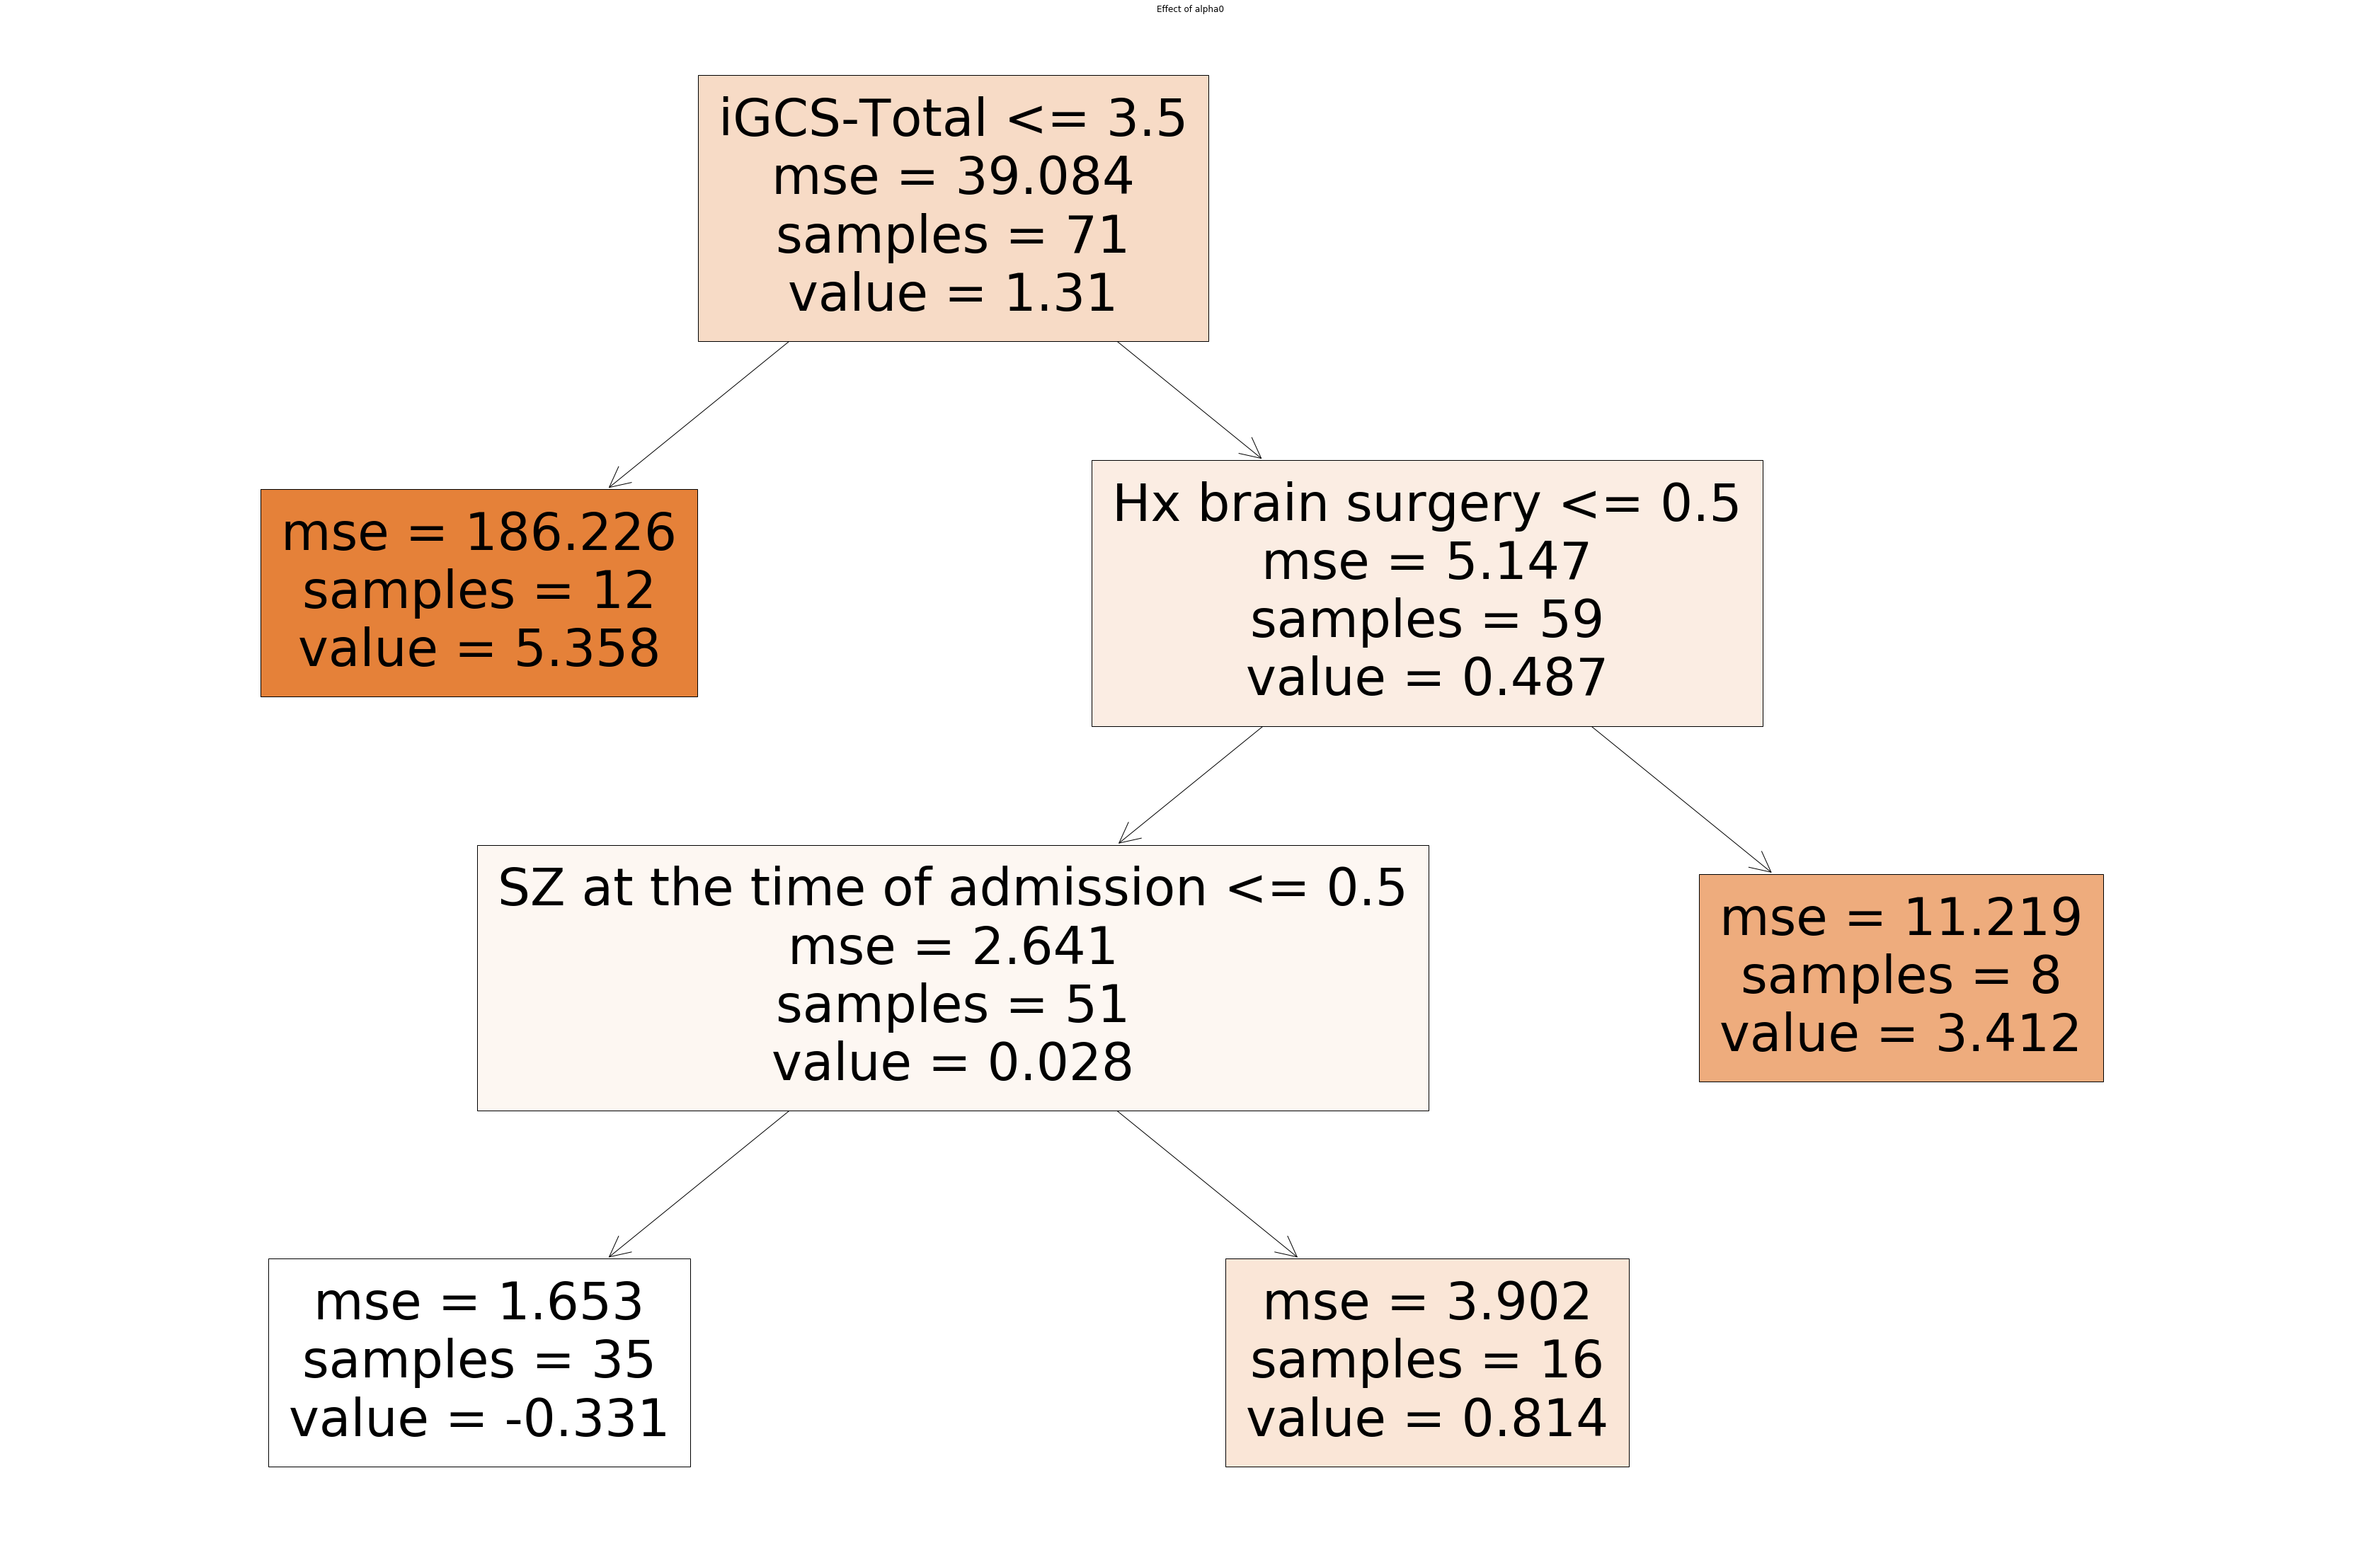

In [6]:
fig,ax = plt.subplots(figsize=(60,40))
tree.plot_tree(model,ax=ax,
               feature_names=['Gender', 'Age', 'marrital', 'Hx CVA (including TIA)', 'Hx HTN',
       'Hx Sz /epilepsy', 'Hx brain surgery', 'Hx CKD', 'Hx CAD/MI', 'Hx CHF',
       'Hx DM', 'Hx of HLD', 'Hx tobacco (including ex-smokers)',
       'Hx ETOH abuse any time in their life (just when in the hx is mentioned)',
       'Hx other substance abuse, any time in their life',
       'Hx cancer (other than CNS cancer)', 'Hx CNS cancer', 'Hx COPD/ Asthma',
       'premorbid MRS before admission  (modified ranking scale),before admission',
       'SZ at the time of admission',
       'hydrocephalus  (either on admission or during hospital course)   QPID',
       'iMV  (initial (on admission) mechanical ventilation)', 'systolic BP',
       'diastolic BP', 'Midline shift with any reason ( Document Date)',
       'Primary systemic dx Sepsis/Shock', 'iGCS-Total', 'iGCS = T?', 'iGCS-E',
       'iGCS-V', 'iGCS-M', 'Worst GCS in 1st 24',
       'Worst GCS Intubation status', 'iGCS actual scores',
       'neuro_dx_Seizures/status epilepticus',
       'prim_dx_Respiratory disorders'],filled = True)
plt.title('Effect of %s'%(col_y))
fig.savefig('importance_tree_%s.png'%(col_y))

In [50]:
X.shape

(71, 36)

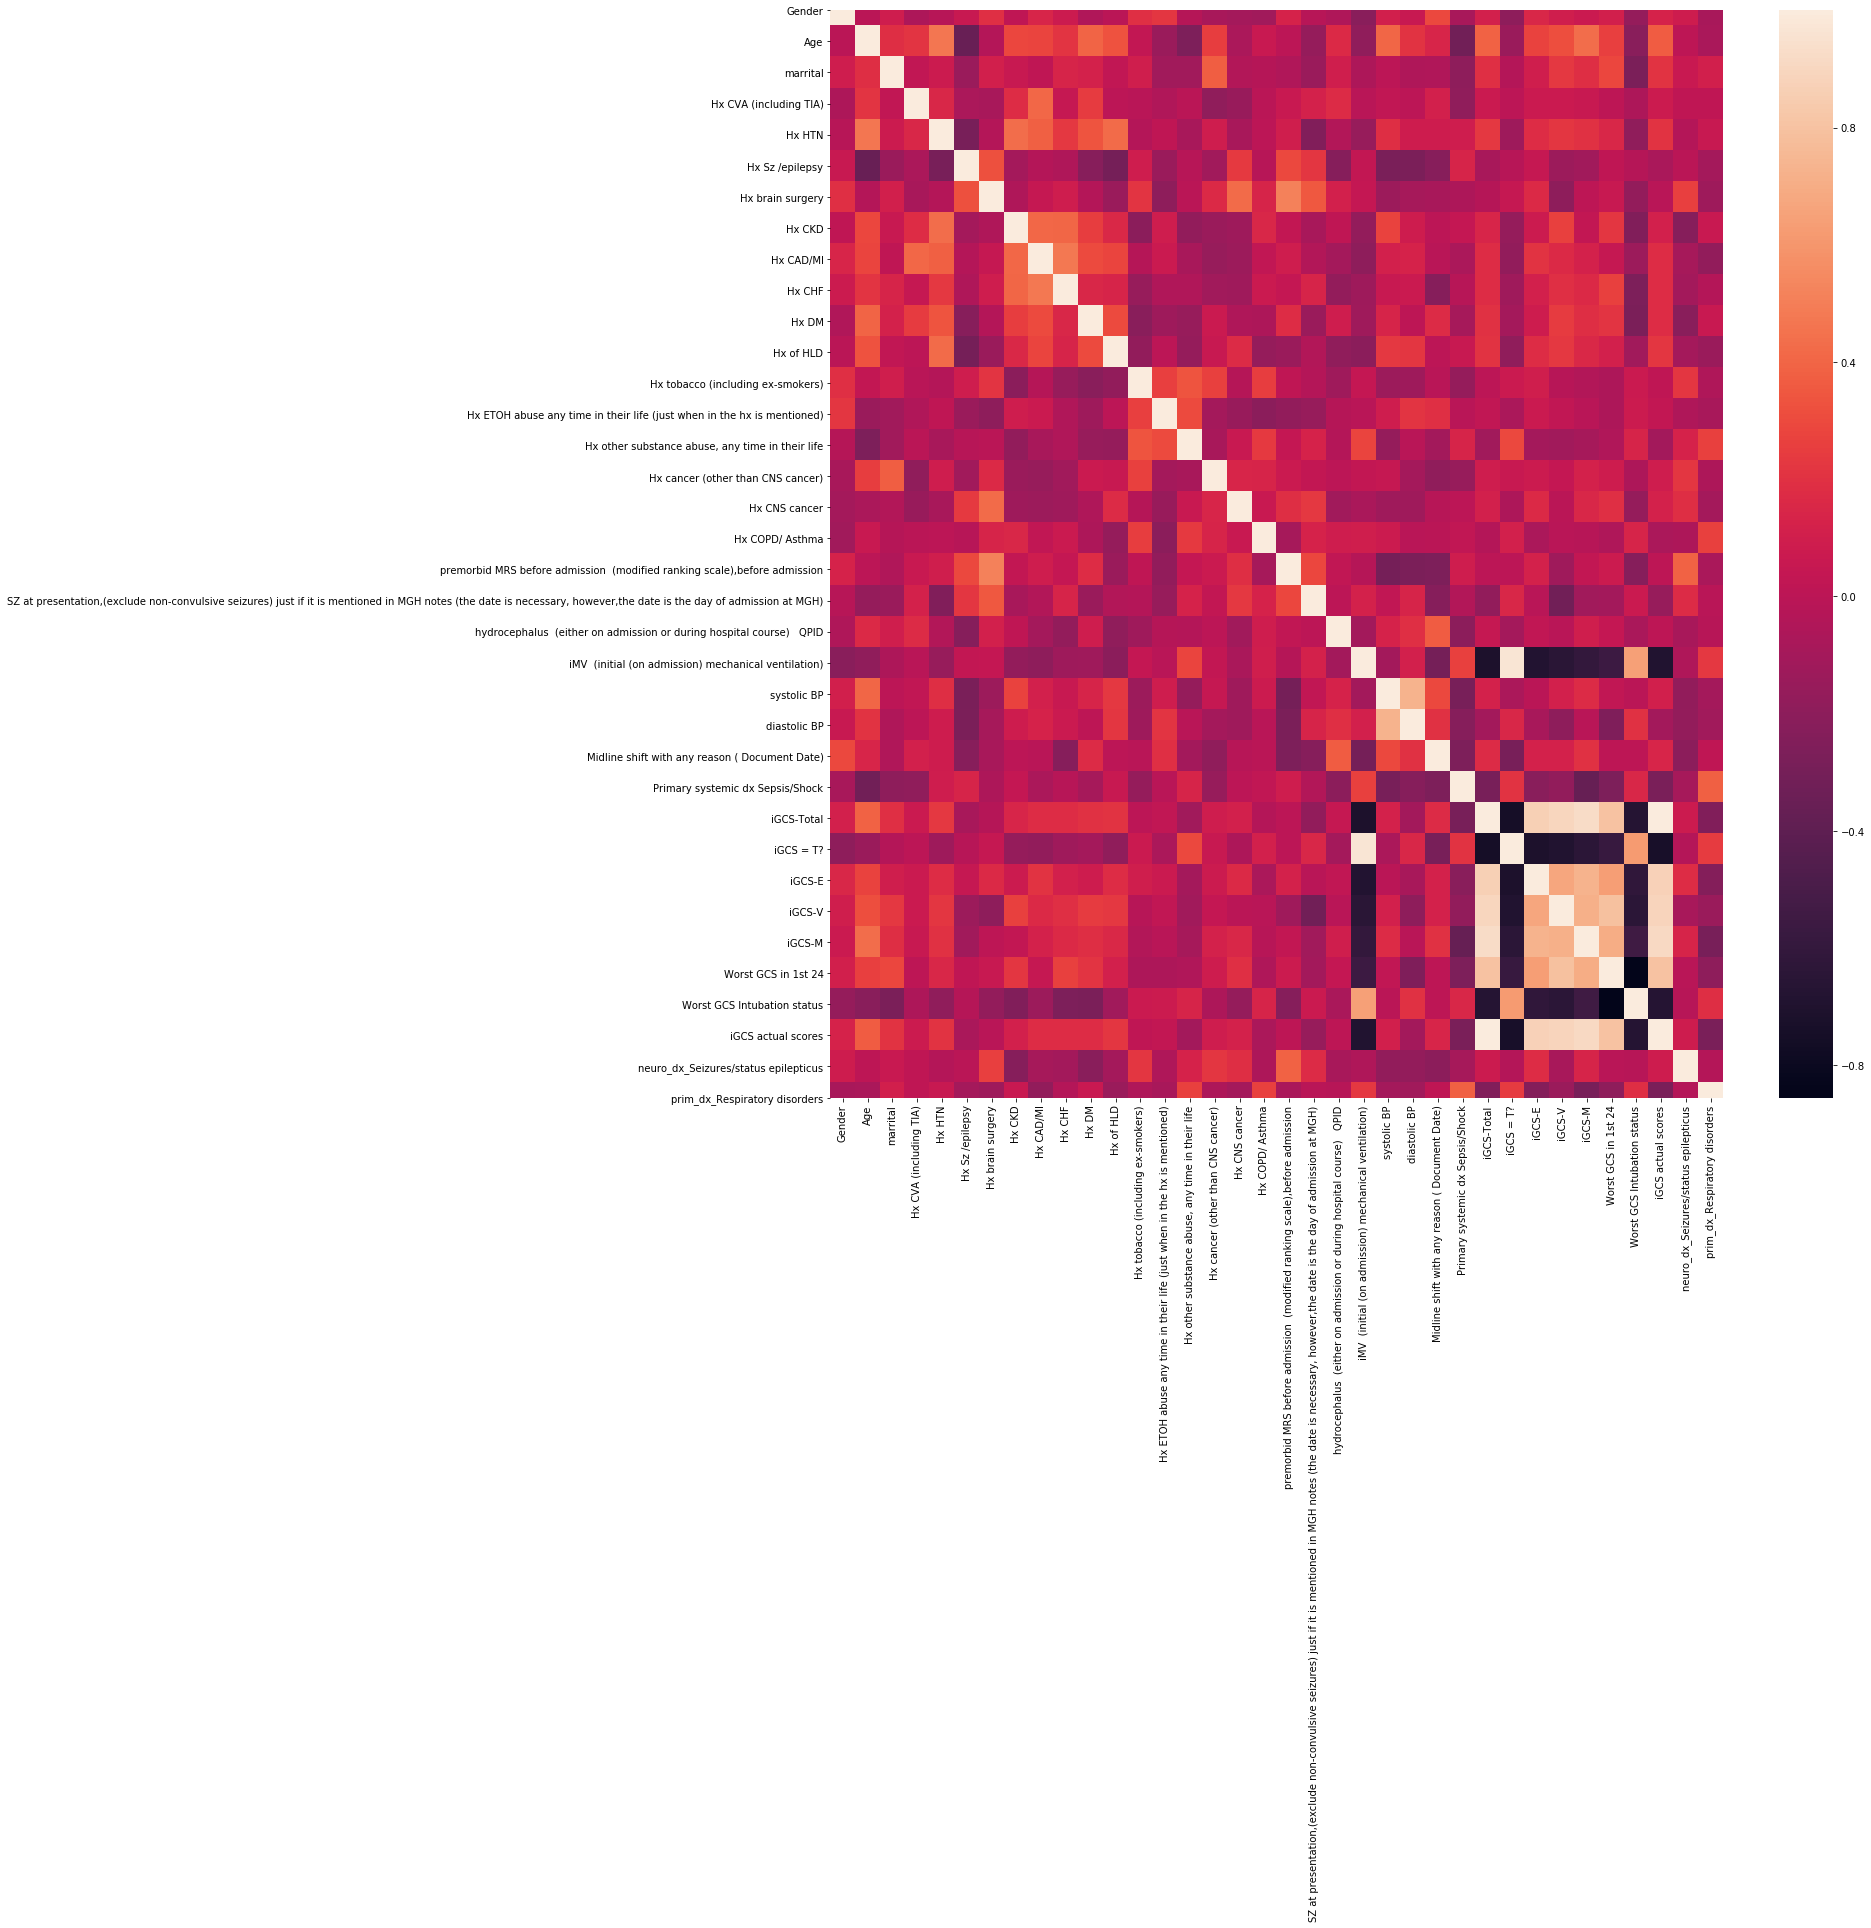

In [7]:
C_correlation = np.corrcoef(X,rowvar=False)
fig = plt.figure(figsize=(20,20))
sns.heatmap(C_correlation)
plt.xticks(np.arange(C_correlation.shape[0])+0.5,X.columns,rotation=90)
plt.yticks(np.arange(C_correlation.shape[0])+0.5,X.columns,rotation=0)
fig.savefig('correlation_c.png')

# Part 2 - Observational Study for Efficacy of Drugs

Let's start with studying the efficacy of Midazolam

### Reading Patients' Data


In [169]:
import numpy as np
import pandas as pd
import sklearn.tree as tree
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import scipy.io as sio
import tqdm
import os
import sklearn.ensemble as ensemble
import sklearn.linear_model as lm

data_dir = '/Users/harshparikh/IIC/step1_output/'

In [170]:
covariates = pd.read_csv(data_dir+'covariates.csv',index_col=0)
covariates.head()

,Gender,Age,marrital,APACHE II first 24,Hx CVA (including TIA),Hx HTN,Hx Sz /epilepsy,Hx brain surgery,Hx CKD,Hx CAD/MI,...,iGCS-Total,iGCS = T?,iGCS-E,iGCS-V,iGCS-M,Worst GCS in 1st 24,Worst GCS Intubation status,iGCS actual scores,neuro_dx_Seizures/status epilepticus,prim_dx_Respiratory disorders
Index,,,,,,,,,,,,,,,,,,,,,
sid36,0,73.84,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,9,0,4,1,4,3,1,9,0,0
sid39,0,70.77,0.0,NaN,1.0,1.0,1.0,0.0,0.0,0.0,...,9,0,4,1,4,9,0,9,1,0
sid56,1,82.84,0.0,NaN,1.0,0.0,1.0,0.0,0.0,1.0,...,12,0,4,3,5,3,1,12,1,0
sid297,0,58.95,1.0,NaN,1.0,1.0,1.0,0.0,1.0,1.0,...,15,0,4,5,6,15,0,15,0,0
sid327,0,45.47,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,7,1,1,1,5,7,1,7,1,0


In [171]:
outcomes = pd.read_csv(data_dir+'outcomes.csv',index_col=0)
outcomes.head()

,DC MRS (modified ranking scale),DC GOSE (extended glasgow outcome scale),"DC dispo home=1, rehab=2, SNF =3, hospice =4, dead =5"
Index,,,
sid36,4,3.0,2.0
sid39,4,3.0,2.0
sid56,5,3.0,2.0
sid297,3,4.0,1.0
sid327,6,1.0,5.0


In [172]:
def get_pk_k():
    halflife = pd.DataFrame({
        'lacosamide':[13],
        'levetiracetam':[6],
        'midazolam':[1.5],
        'pentobarbital':[15],
        'phenobarbital':[53],
        'phenytoin':[22],
        'propofol':[1.5],
        'valproate':[8]
        },index=['t1/2'])
    halflife = halflife.append(np.log(2) / halflife.rename(index={'t1/2':'k'}))
    PK_K = halflife.loc['k']
    return PK_K
    
def drug_concentration(d_ts,k):
    """
    d_ts.shape = (#drug, T)
    """
    k_ts = np.array([ np.exp(-k*t) for t in range(d_ts.shape[1]) ]).T
    conc = np.array([np.convolve(d_ts[i],k_ts[i],'full') for i in range(d_ts.shape[0])])
    conc = conc[:,:d_ts.shape[1]]
    return conc


# # data functions


def patient(path, W):
    window = W
    step   = W
    
    #if '.mat' in path:
    mat = sio.loadmat(path)
    human_iic = mat['human_iic'].flatten().astype(float)
    spike = mat['spike'].flatten().astype(float)
    drugs = mat['drugs_weightnormalized'].astype(float)
    artifact = mat['artifact'].flatten().astype(float)
    freq = mat['spec_freq'].flatten().astype(float)
    spec = mat['spec'].astype(float)
    human_iic[artifact==1] = np.nan
    spike[artifact==1] = np.nan

    drugnames = list(map(lambda x: x.strip(), mat['Dnames']))
    drugs_window = np.array([ np.mean(drugs[i:i+window],axis=0) for i in range(0,len(drugs),step) ])

    sz_burden = (human_iic==1).astype(float)
    sz_burden[np.isnan(human_iic)] = np.nan
    sz_burden_window = np.array([np.nanmean(sz_burden[i:i+window]) for i in range(0, len(sz_burden),step)])

    iic_burden = np.in1d(human_iic, [1,2,3,4]).astype(float)
    iic_burden[np.isnan(human_iic)] = np.nan
    iic_burden_window = np.array([np.nanmean(iic_burden[i:i+window]) for i in range(0, len(iic_burden),step)])

    spike_rate_window = np.array([np.nanmean(spike[i:i+window]) for i in range(0, len(spike),step)])

    spec_window = np.array([np.nanmean(spec[i:i+window], axis=0) for i in range(0, len(spec),step)])
    
    res = {'sz_burden': sz_burden_window,
           'iic_burden': iic_burden_window,
           'spike_rate': spike_rate_window,
           'spec': spec_window,
           'freq': freq}
    for i, dn in enumerate(drugnames):
        res[dn] = drugs_window[:,i]
    return res


# In[6]:


def preprocess(sid, data_dir, PK_K, W, drugs_tostudy):  # previsously called patient_data

    #fetch the data
    p = patient(os.path.join(data_dir, sid + '.mat'), W)

    #setting up the data
    response_tostudy = 'iic_burden'
    Pobs = p[response_tostudy]

    #PK
    Ddose = np.array([p[x] for x in drugs_tostudy])
    D = drug_concentration(Ddose, PK_K[drugs_tostudy].values).T

    #cov_tostudy = ['Age']
    C = pd.read_csv(os.path.join(data_dir, 'covariates.csv'))
    Cname = list(C.columns)
    C = C[C.Index==sid].iloc[0]#[cov_tostudy]
    
    return Pobs, response_tostudy, D, drugs_tostudy, C, Cname, p['spec'], p['freq']


In [173]:
patients = {}

sids = ['sid2', 'sid8', 'sid13', 'sid17', 'sid18', 'sid30', 'sid36', 'sid39', 'sid54',
        'sid56', 'sid69', 'sid77', 'sid82', 'sid88', 'sid91', 'sid92', 'sid297', 'sid327',
        'sid385', 'sid395', 'sid400', 'sid403', 'sid406', 'sid424', 'sid450', 'sid456',
        'sid490', 'sid512', 'sid551', 'sid557', 'sid734', 'sid736', 'sid801', 'sid821',
        'sid824', 'sid827', 'sid832', 'sid833', 'sid834', 'sid839', 'sid848', 'sid849',
        'sid852', 'sid872', 'sid876', 'sid880', 'sid881', 'sid884', 'sid886',
        'sid915', 'sid940', 'sid942', 'sid944', 'sid952', 'sid960', 'sid965', 'sid967',
        'sid983', 'sid987', 'sid988', 'sid994', 'sid1002', 'sid1006', 'sid1016', 'sid1022',
        'sid1025', 'sid1034', 'sid1038', 'sid1039', 'sid1055', 'sid1056', 'sid1063', 'sid1113',
        'sid1116', 'sid1337', 'sid1913', 'sid1915', 'sid1916', 'sid1917', 'sid1928', 'sid1956', 'sid1966']

drugs_tostudy = ['lacosamide', 'levetiracetam', 'midazolam','propofol', 'valproate']
    
PK_K = get_pk_k()

W = 300
Pobs = {}
D = {}
# spec = []
# freq = []
for sid in tqdm.tqdm(sids):
    Pobs_, Pname, D_, Dname, C_, Cname, spec_, freq_ = preprocess(sid, data_dir, PK_K, W, drugs_tostudy)
    Pobs_ = pd.DataFrame(Pobs_.reshape(-1,1),columns=[Pname])
    D_ = pd.DataFrame(D_,columns=Dname)
    Pobs[sid] = Pobs_
    D[sid] = D_

100%|██████████| 82/82 [00:22<00:00,  3.69it/s]


In [174]:
covariates.loc[sids].head()

,Gender,Age,marrital,APACHE II first 24,Hx CVA (including TIA),Hx HTN,Hx Sz /epilepsy,Hx brain surgery,Hx CKD,Hx CAD/MI,...,iGCS-Total,iGCS = T?,iGCS-E,iGCS-V,iGCS-M,Worst GCS in 1st 24,Worst GCS Intubation status,iGCS actual scores,neuro_dx_Seizures/status epilepticus,prim_dx_Respiratory disorders
Index,,,,,,,,,,,,,,,,,,,,,
sid2,0,85.01,0.0,NaN,0.0,1.0,0.0,0.0,1.0,0.0,...,7,0,1,2,4,3,1,3,0,1
sid8,0,67.24,0.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,...,12,0,4,2,6,11,0,12,1,0
sid13,0,48.12,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,10,0,4,1,5,3,1,10,1,0
sid17,0,35.03,0.0,NaN,0.0,0.0,1.0,0.0,0.0,0.0,...,8,0,1,2,5,8,0,8,0,0
sid18,1,60.20,0.0,NaN,0.0,1.0,1.0,1.0,0.0,0.0,...,4,1,2,1,1,4,1,4,1,0


In [175]:
outcomes.loc[sids].head()

,DC MRS (modified ranking scale),DC GOSE (extended glasgow outcome scale),"DC dispo home=1, rehab=2, SNF =3, hospice =4, dead =5"
Index,,,
sid2,5,2.0,4.0
sid8,4,4.0,2.0
sid13,5,2.0,2.0
sid17,6,1.0,5.0
sid18,5,2.0,2.0


In [176]:
def intervention_information(Pobs,D,sids,f=6):
    Pobs_pre, intervention, outcome, time_of_int = {}, {}, {}, {}
    for sid in sids:
        t = np.min(D[sid].loc[D[sid].sum(axis=1) > 0].index)
        Pobs_pre[sid] = Pobs[sid].loc[:t]['iic_burden']
        intervention[sid] = D[sid].loc[t]
        outcome[sid] = Pobs[sid].loc[t:t+f]['iic_burden'].to_numpy()
        time_of_int[sid] = t
    return pd.DataFrame.from_dict(Pobs_pre,orient='index'), pd.DataFrame.from_dict(intervention,orient='index'), pd.DataFrame.from_dict(outcome,orient='index'), pd.DataFrame.from_dict(time_of_int,orient='index')

In [177]:
f=12
Pobs_pre, intervention, short_term_outcome, time_of_int = intervention_information(Pobs,D,sids,f)

In [178]:
distance = lambda x,y: np.linalg.norm(x-y)
def neighbors(x,S,k=1):
    d_array = list( map( lambda y: distance(x,y), S.to_numpy() ) )
    kneighbor = S.index[np.argpartition(d_array, k)[:k]]
    return kneighbor

In [179]:
Sc = Pobs_pre.loc[intervention['midazolam']==0].max(axis=1)
St = Pobs_pre.loc[intervention['midazolam']>0].max(axis=1)

  9%|▊         | 7/82 [00:01<00:16,  4.57it/s]

sid30


100%|██████████| 82/82 [00:05<00:00, 15.47it/s]


(-1, 1)

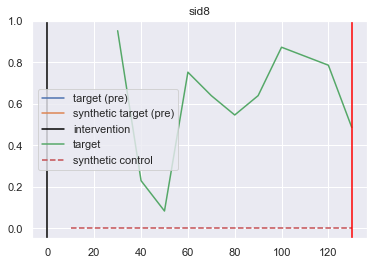

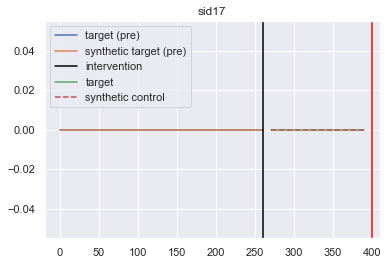

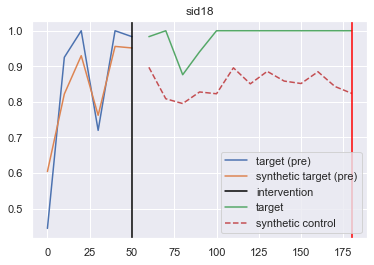

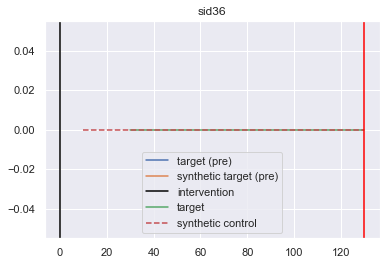

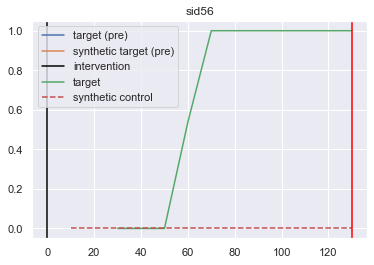

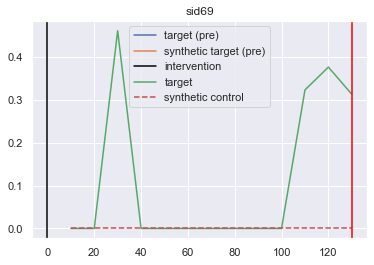

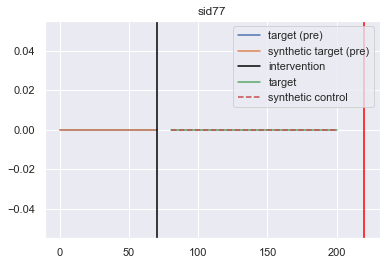

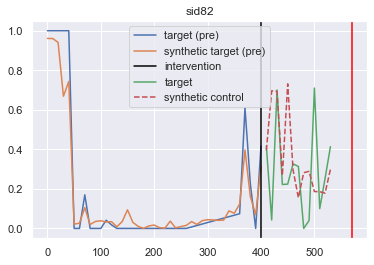

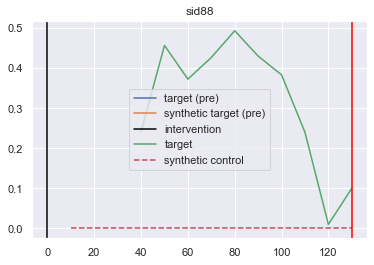

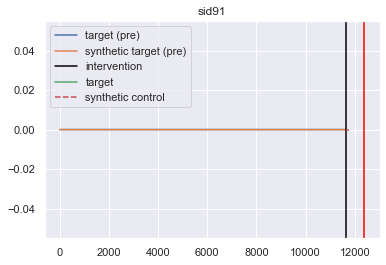

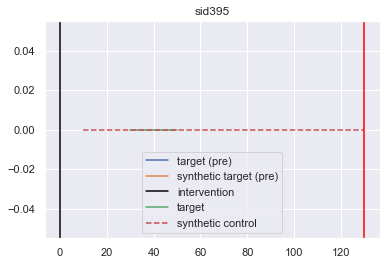

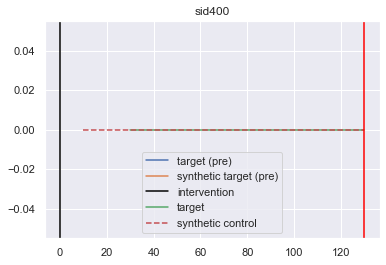

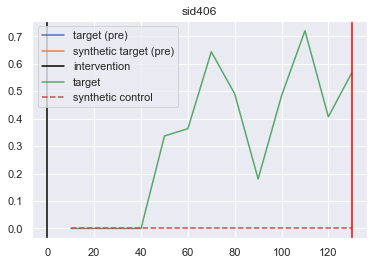

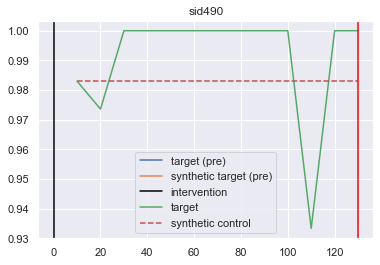

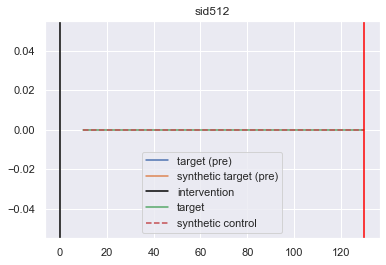

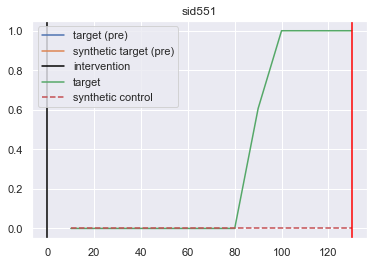

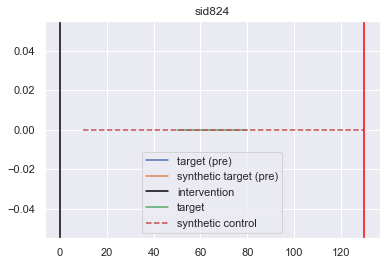

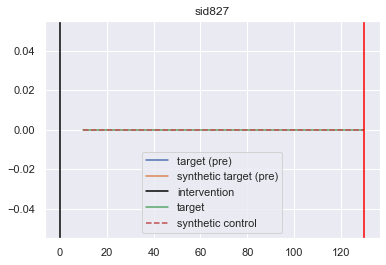

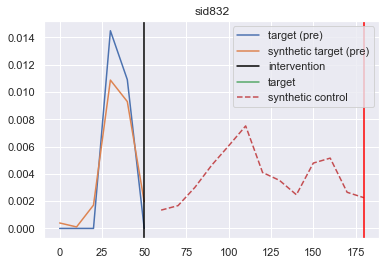

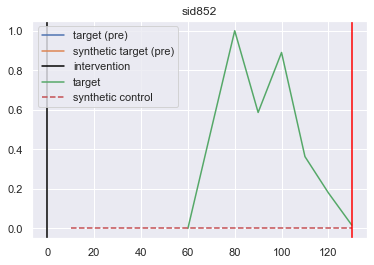

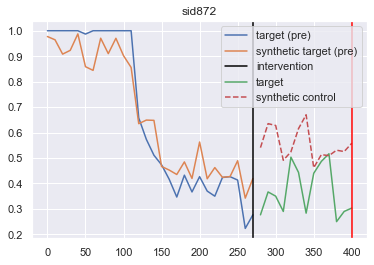

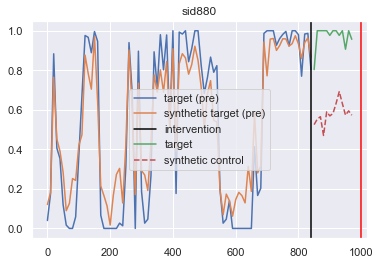

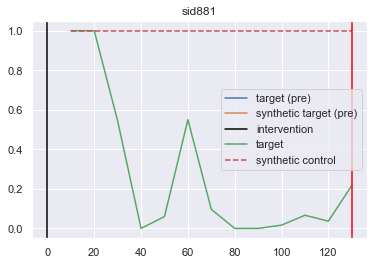

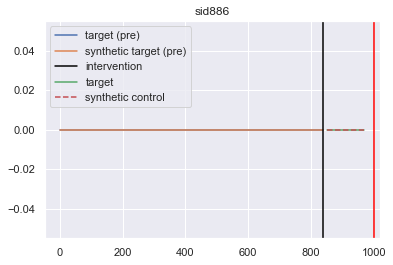

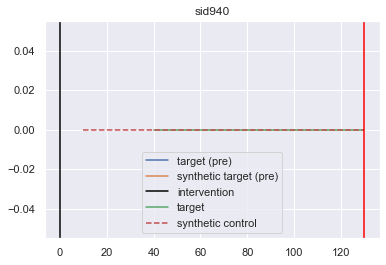

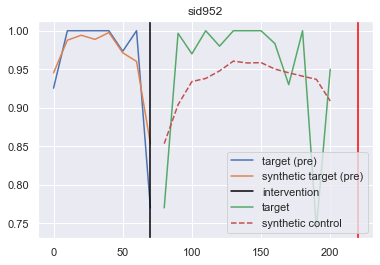

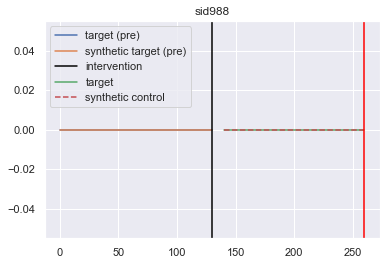

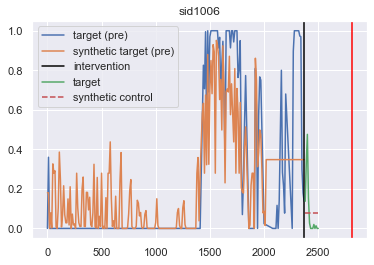

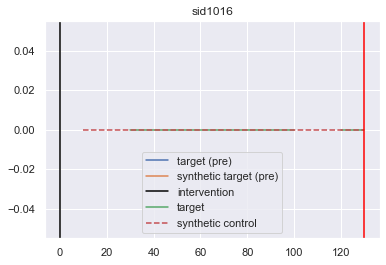

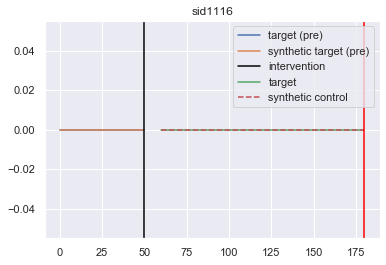

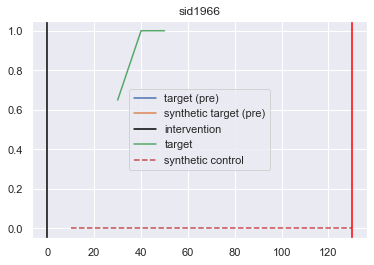

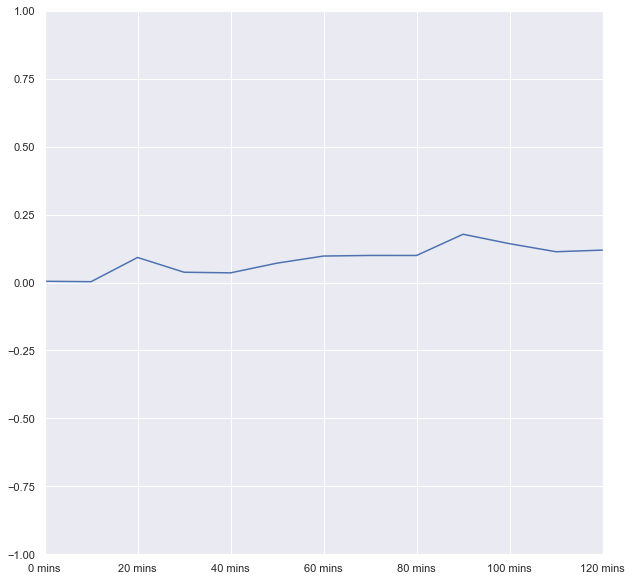

In [182]:
#Synthetic Control
T = intervention['propofol']>0
TE_propofol = []
import sklearn.ensemble as ensemble
for sid in tqdm.tqdm(sids):
    t = T.loc[sid]
    if t:
        x = Pobs_pre.loc[sid,:time_of_int[0].loc[sid]].interpolate(method='linear', limit_direction='forward', axis=0).fillna(method='bfill').fillna(0)
        y1 = short_term_outcome.loc[sid]
        x0 = Pobs_pre.loc[time_of_int[0]>time_of_int[0].loc[sid]+f,0:time_of_int[0].loc[sid]].T
        x0 = x0.interpolate(method='linear', limit_direction='forward', axis=0).fillna(method='bfill').fillna(0)
        try:
#             model = lm.Ridge().fit(x0,x) x = \sum_j w_j x0_j 
            model = ensemble.RandomForestRegressor().fit(x0,x)
            fig=plt.figure()
            plt.title(sid)
            plt.plot(10*np.arange(0,len(x)),x)
            plt.plot(10*np.arange(0,len(x)),model.predict(x0))
#             plt.plot(np.arange(0,len(x)),np.mean(x0,axis=1))
            plt.axvline(10*time_of_int[0].loc[sid],c='black')
            y0 = Pobs_pre.loc[time_of_int[0]>time_of_int[0].loc[sid]+f,time_of_int[0].loc[sid]:time_of_int[0].loc[sid]+f].T
            y0 = y0.interpolate(method='linear', limit_direction='forward', axis=0).fillna(method='bfill').fillna(0)
            y0_predict = model.predict(y0)
            plt.plot(10*np.arange(len(x),len(x)+len(y1)),y1)
            plt.plot(10*np.arange(len(x),len(x)+len(y1)),model.predict(y0),'--')
#             plt.plot(np.arange(len(x),len(x)+len(y1)),np.mean(y0,axis=1),'*')
            plt.axvline(10*np.min(time_of_int.loc[time_of_int[0]>time_of_int[0].loc[sid]+f,0]),c='red')
            plt.legend(['target (pre)','synthetic target (pre)','intervention','target','synthetic control'])
            TE_propofol.append(y1-y0_predict)
        except:
            print(sid)
TE_propofol_df = pd.DataFrame(TE_propofol).rename(columns={i:'%d mins'%(10*i) for i in range(f+1)})
fig=plt.figure(figsize=(10,10))
TE_propofol_df.mean(axis=0).plot()
plt.ylim((-1,1))

100%|██████████| 82/82 [00:00<00:00, 106.31it/s]


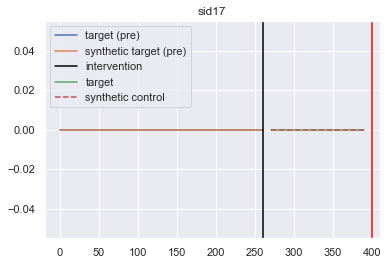

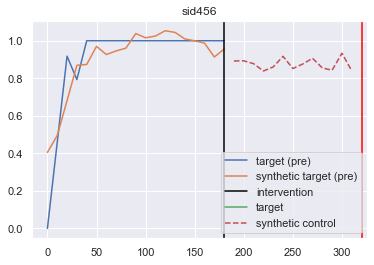

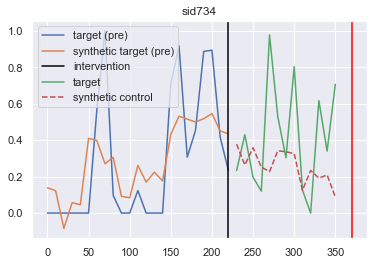

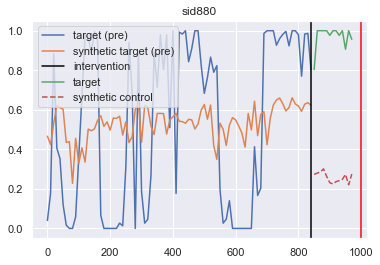

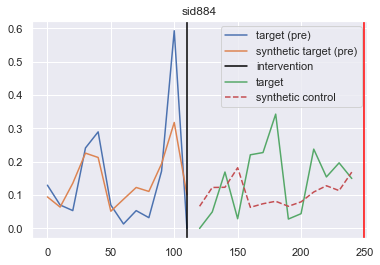

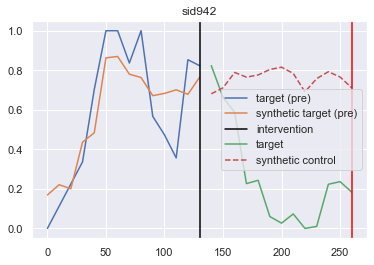

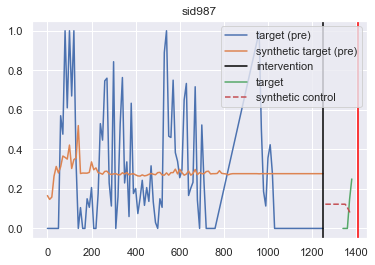

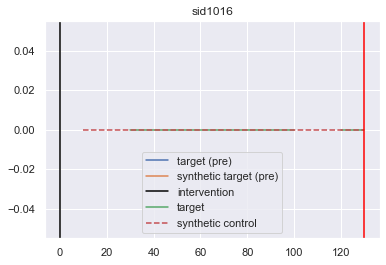

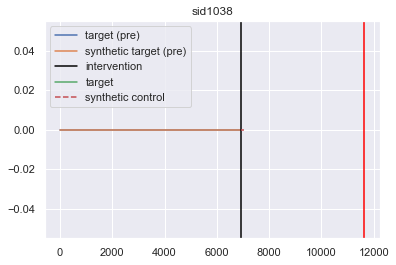

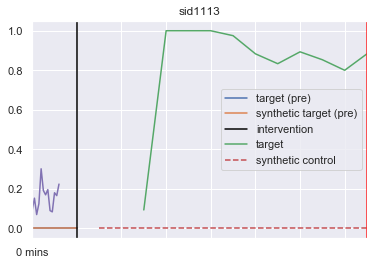

In [14]:
#Synthetic Control
sns.set()
T = intervention['midazolam']>0
TE_midazolam = []
import sklearn.ensemble as ensemble
for sid in tqdm.tqdm(sids[:]):
    t = T.loc[sid]
    if t:
        x = Pobs_pre.loc[sid,:time_of_int[0].loc[sid]].interpolate(method='linear', limit_direction='forward', axis=0).fillna(method='bfill').fillna(0)
        y1 = short_term_outcome.loc[sid]
        x0 = Pobs_pre.loc[time_of_int[0]>time_of_int[0].loc[sid]+f,0:time_of_int[0].loc[sid]].T 
        #for a control unit, the time of first intervention has to be after (f+time of first intervention for unit i)
        x0 = x0.interpolate(method='linear', limit_direction='forward', axis=0).fillna(method='bfill').fillna(0)
        try:
#             model = ensemble.AdaBoostRegressor().fit(x0,x)
            model = lm.Ridge().fit(x0,x) # x = \sum_j w_j x0_j --> I found this w_j
#             model = ensemble.RandomForestRegressor().fit(x0,x)
            fig=plt.figure()
            plt.title(sid)
            plt.plot(10*np.arange(0,len(x)),x)
            plt.plot(10*np.arange(0,len(x)),model.predict(x0))
#             plt.plot(np.arange(0,len(x)),np.mean(x0,axis=1))
            plt.axvline(10*time_of_int[0].loc[sid],c='black')
            y0 = Pobs_pre.loc[time_of_int[0]>time_of_int[0].loc[sid]+f,time_of_int[0].loc[sid]:time_of_int[0].loc[sid]+f].T
            y0 = y0.interpolate(method='linear', limit_direction='forward', axis=0).fillna(method='bfill').fillna(0)
            y0_predict = model.predict(y0) #syn_y0 = \sum_j w_j y0_j
            plt.plot(10*np.arange(len(x),len(x)+len(y1)),y1)
            plt.plot(10*np.arange(len(x),len(x)+len(y1)),model.predict(y0),'--')
#             plt.plot(np.arange(len(x),len(x)+len(y1)),np.mean(y0,axis=1),'*')
            plt.axvline(10*np.min(time_of_int.loc[time_of_int[0]>time_of_int[0].loc[sid]+f,0]),c='red')
            plt.legend(['target (pre)','synthetic target (pre)','intervention','target','synthetic control'])
            TE_midazolam.append(y1-y0_predict)
            
        except:
            print(sid)
TE_midazolam_df = pd.DataFrame(TE_midazolam).rename(columns={i:'%d mins'%(10*i) for i in range(f+1)})
TE_midazolam_df.mean(axis=0).plot()

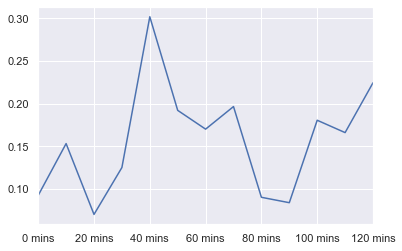

In [15]:
TE_midazolam_df.mean(axis=0).plot() #average(y1 - y0) : negative means drug is working as expected, positive is weird

100%|██████████| 82/82 [00:01<00:00, 60.10it/s]


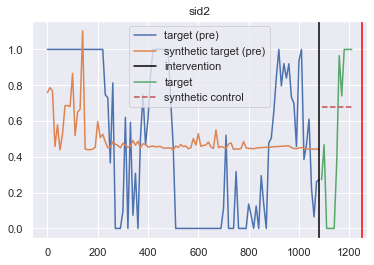

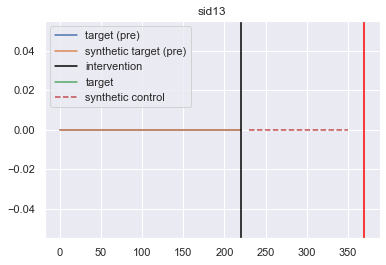

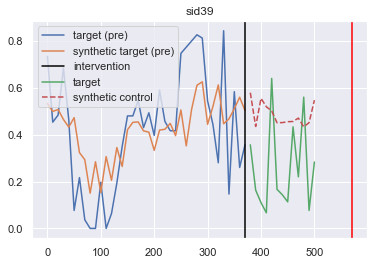

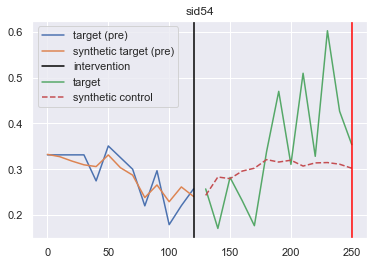

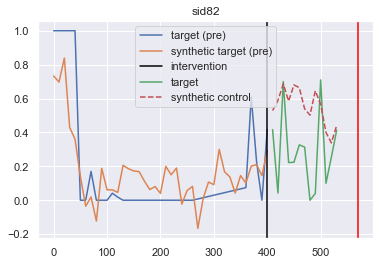

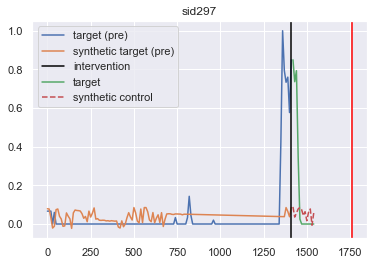

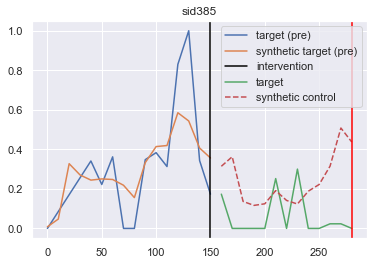

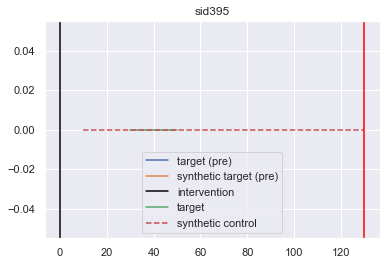

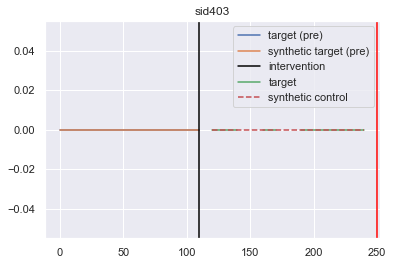

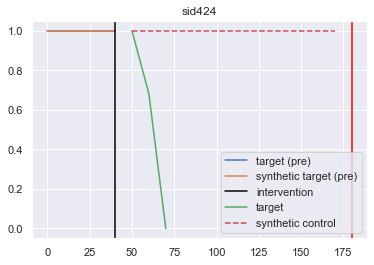

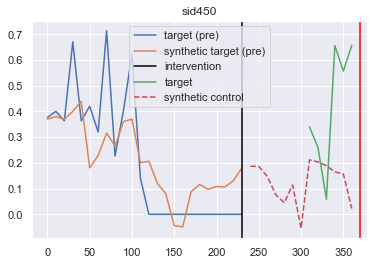

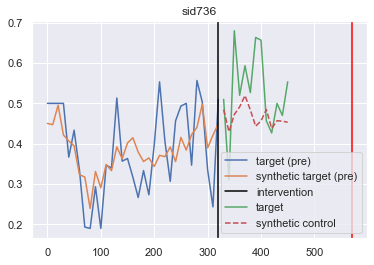

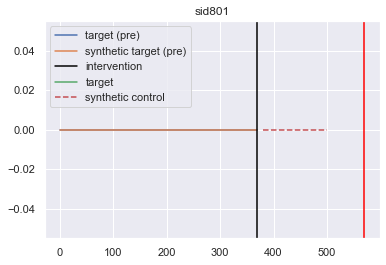

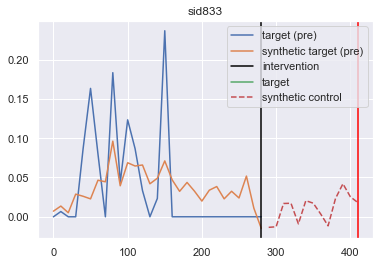

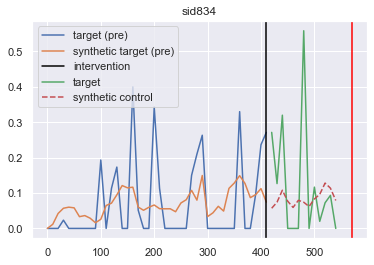

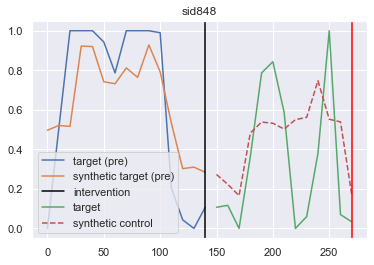

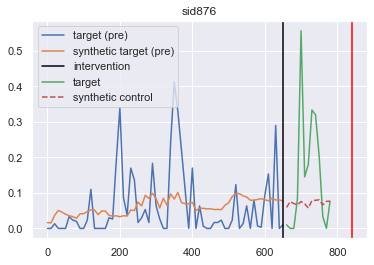

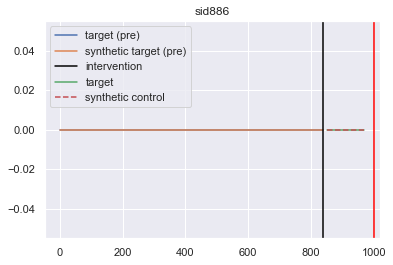

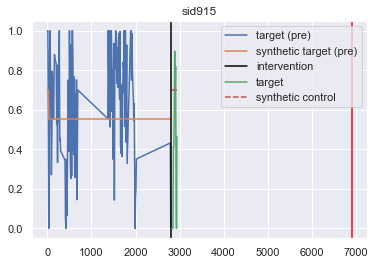

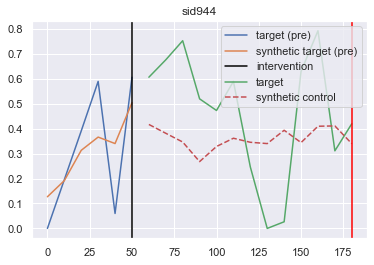

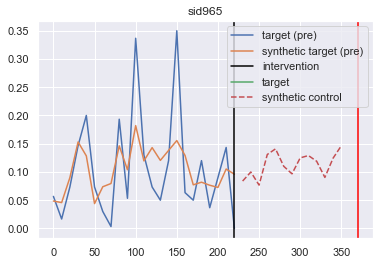

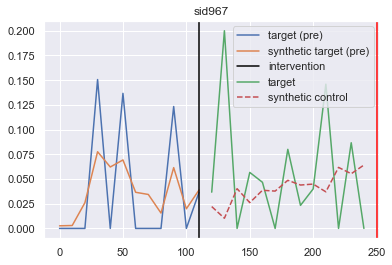

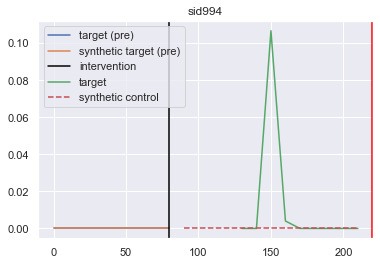

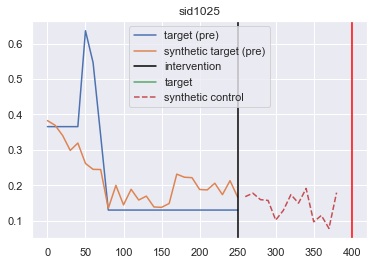

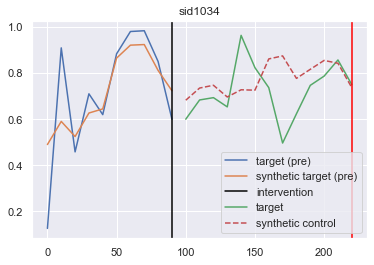

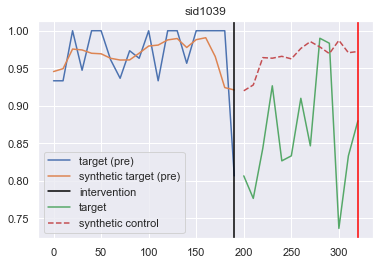

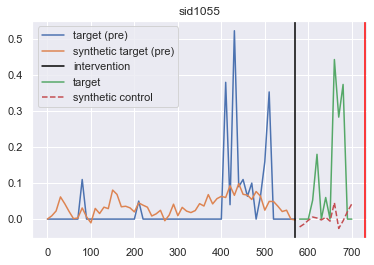

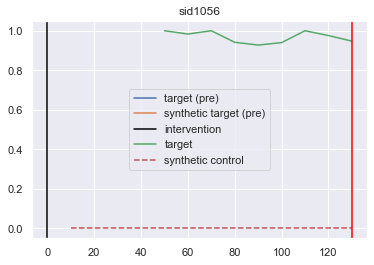

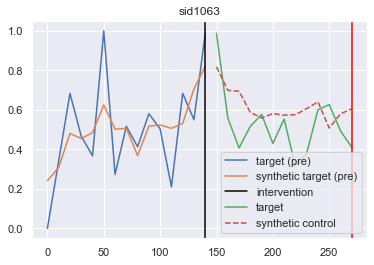

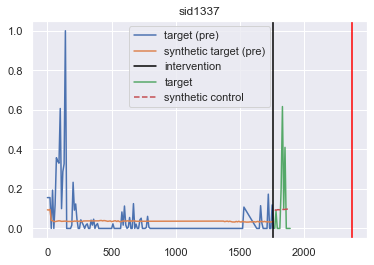

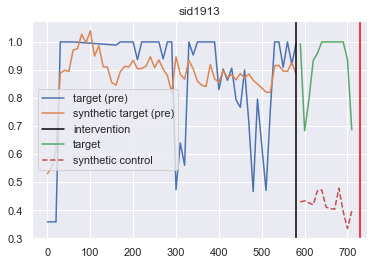

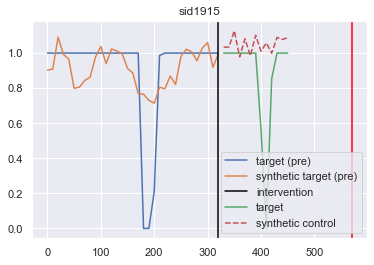

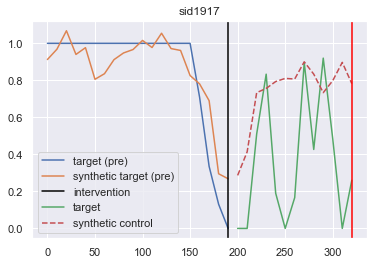

In [480]:
#Synthetic Control
T = intervention['levetiracetam']>0
TE_lev = []
import sklearn.ensemble as ensemble
for sid in tqdm.tqdm(sids):
    t = T.loc[sid]
    if t:
        x = Pobs_pre.loc[sid,:time_of_int[0].loc[sid]].interpolate(method='linear', limit_direction='forward', axis=0).fillna(method='bfill').fillna(0)
        y1 = short_term_outcome.loc[sid]
        x0 = Pobs_pre.loc[time_of_int[0]>time_of_int[0].loc[sid]+f,0:time_of_int[0].loc[sid]].T
        x0 = x0.interpolate(method='linear', limit_direction='forward', axis=0).fillna(method='bfill').fillna(0)
        try:
            model = lm.Ridge().fit(x0,x)
#             model = ensemble.ExtraTreesRegressor().fit(x0,x)
            fig=plt.figure()
            plt.title(sid)
            plt.plot(10*np.arange(0,len(x)),x)
            plt.plot(10*np.arange(0,len(x)),model.predict(x0))
#             plt.plot(np.arange(0,len(x)),np.mean(x0,axis=1))
            plt.axvline(10*time_of_int[0].loc[sid],c='black')
            y0 = Pobs_pre.loc[time_of_int[0]>time_of_int[0].loc[sid]+f,time_of_int[0].loc[sid]:time_of_int[0].loc[sid]+f].T
            y0 = y0.interpolate(method='linear', limit_direction='forward', axis=0).fillna(method='bfill').fillna(0)
            y0_predict = model.predict(y0)
            plt.plot(10*np.arange(len(x),len(x)+len(y1)),y1)
            plt.plot(10*np.arange(len(x),len(x)+len(y1)),model.predict(y0),'--')
#             plt.plot(np.arange(len(x),len(x)+len(y1)),np.mean(y0,axis=1),'*')
            plt.axvline(10*np.min(time_of_int.loc[time_of_int[0]>time_of_int[0].loc[sid]+f,0]),c='red')
            plt.legend(['target (pre)','synthetic target (pre)','intervention','target','synthetic control'])
            TE_lev.append(y1-y0_predict)
        except:
            print(sid)
TE_lev_df = pd.DataFrame(TE_lev).rename(columns={i:'%d mins'%(10*i) for i in range(f+1)})
# TE_lev_df.mean(axis=0).plot()

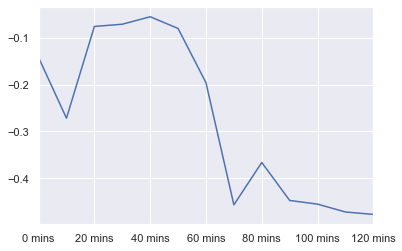

In [481]:
#Matching
epsilon = 0.0001
TE_midazolam = []
for sid in sids:
    x = Pobs_pre.loc[sid]
    t = T.loc[sid]
    if t:
        y1 = short_term_outcome.loc[sid]
        kneighbor = neighbors(x,Sc)
        y0 = short_term_outcome.loc[kneighbor].mean(axis=0)
    else:
        y0 = short_term_outcome.loc[sid]
        kneighbor = neighbors(x,St)
        y1 = short_term_outcome.loc[kneighbor].mean(axis=0)
    TE_midazolam.append((y1-y0))
TE_midazolam_df = pd.DataFrame(TE_midazolam).rename(columns={i:'%d mins'%(10*i) for i in range(f+1)})
TE_midazolam_df.mean(axis=0).plot()
# TE_midazolam_df.plot()

In [374]:
x0 = Pobs_pre.loc[time_of_int[0]>time_of_int[0].loc['sid30']+f,0:time_of_int[0].loc['sid30']].T

In [376]:
time_of_int.loc['sid30']

0    1239
Name: sid30, dtype: int64

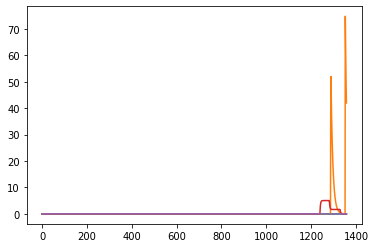

In [385]:
plt.plot(D['sid30'])

# Part-3 Matching on System Dynamics for short-term drug effect estimation

In [198]:
import numpy as np
import pandas as pd
import sklearn.tree as tree
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
import pandas as pd
import sklearn.tree as tree
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import scipy.io as sio
import tqdm
import os
import sklearn.ensemble as ensemble
import sklearn.linear_model as lm

data_dir = '/Users/harshparikh/IIC/step1_output/'
warnings.filterwarnings("ignore")

In [199]:
data = pd.read_csv('/Users/harshparikh/Documents/GitHub/iic_causal_inference/aim1/simulator/results/params_cauchy_expit_ARMA16_iter1000.csv',index_col=0)
data.head()

,cluster,alpha0,alpha[1],theta[1],theta[2],theta[3],theta[4],theta[5],theta[6],sigma_err,...,iGCS-Total,iGCS = T?,iGCS-E,iGCS-V,iGCS-M,Worst GCS in 1st 24,Worst GCS Intubation status,iGCS actual scores,neuro_dx_Seizures/status epilepticus,prim_dx_Respiratory disorders
SID,,,,,,,,,,,,,,,,,,,,,
sid2,5,0.311404,0.243438,-0.082542,-0.016406,0.007245,0.003303,-0.001077,-0.002507,2.787910,...,7.0,0.0,1.0,2.0,4.0,3.0,1.0,3.0,0.0,1.0
sid8,5,1.211867,0.170145,-0.082542,-0.016406,0.007245,0.003303,-0.001077,-0.002507,2.787910,...,12.0,0.0,4.0,2.0,6.0,11.0,0.0,12.0,1.0,0.0
sid13,5,0.669065,0.228883,-0.082542,-0.016406,0.007245,0.003303,-0.001077,-0.002507,2.787910,...,10.0,0.0,4.0,1.0,5.0,3.0,1.0,10.0,1.0,0.0
sid17,5,-0.645282,0.381436,-0.082542,-0.016406,0.007245,0.003303,-0.001077,-0.002507,2.787910,...,8.0,0.0,1.0,2.0,5.0,8.0,0.0,8.0,0.0,0.0
sid18,4,2.849906,0.145905,-0.082542,-0.016406,0.007245,0.003303,-0.001077,-0.002507,2.583988,...,4.0,1.0,2.0,1.0,1.0,4.0,1.0,4.0,1.0,0.0


In [200]:
outcomes = pd.read_csv(data_dir+'outcomes.csv',index_col=0)
outcomes = outcomes.loc[data.index]
outcomes.head()

,DC MRS (modified ranking scale),DC GOSE (extended glasgow outcome scale),"DC dispo home=1, rehab=2, SNF =3, hospice =4, dead =5"
SID,,,
sid2,5,2.0,4.0
sid8,4,4.0,2.0
sid13,5,2.0,2.0
sid17,6,1.0,5.0
sid18,5,2.0,2.0


In [201]:
def get_pk_k():
    halflife = pd.DataFrame({
        'lacosamide':[13],
        'levetiracetam':[6],
        'midazolam':[1.5],
        'pentobarbital':[15],
        'phenobarbital':[53],
        'phenytoin':[22],
        'propofol':[1.5],
        'valproate':[8]
        },index=['t1/2'])
    halflife = halflife.append(np.log(2) / halflife.rename(index={'t1/2':'k'}))
    PK_K = halflife.loc['k']
    return PK_K
    
def drug_concentration(d_ts,k):
    """
    d_ts.shape = (#drug, T)
    """
    k_ts = np.array([ np.exp(-k*t) for t in range(d_ts.shape[1]) ]).T
    conc = np.array([np.convolve(d_ts[i],k_ts[i],'full') for i in range(d_ts.shape[0])])
    conc = conc[:,:d_ts.shape[1]]
    return conc


# # data functions


def patient(path, W):
    window = W
    step   = W
    
    #if '.mat' in path:
    mat = sio.loadmat(path)
    human_iic = mat['human_iic'].flatten().astype(float)
    spike = mat['spike'].flatten().astype(float)
    drugs = mat['drugs_weightnormalized'].astype(float)
    artifact = mat['artifact'].flatten().astype(float)
    freq = mat['spec_freq'].flatten().astype(float)
    spec = mat['spec'].astype(float)
    human_iic[artifact==1] = np.nan
    spike[artifact==1] = np.nan

    drugnames = list(map(lambda x: x.strip(), mat['Dnames']))
    drugs_window = np.array([ np.mean(drugs[i:i+window],axis=0) for i in range(0,len(drugs),step) ])

    sz_burden = (human_iic==1).astype(float)
    sz_burden[np.isnan(human_iic)] = np.nan
    sz_burden_window = np.array([np.nanmean(sz_burden[i:i+window]) for i in range(0, len(sz_burden),step)])

    iic_burden = np.in1d(human_iic, [1,2,3,4]).astype(float)
    iic_burden[np.isnan(human_iic)] = np.nan
    iic_burden_window = np.array([np.nanmean(iic_burden[i:i+window]) for i in range(0, len(iic_burden),step)])

    spike_rate_window = np.array([np.nanmean(spike[i:i+window]) for i in range(0, len(spike),step)])

    spec_window = np.array([np.nanmean(spec[i:i+window], axis=0) for i in range(0, len(spec),step)])
    
    res = {'sz_burden': sz_burden_window,
           'iic_burden': iic_burden_window,
           'spike_rate': spike_rate_window,
           'spec': spec_window,
           'freq': freq}
    for i, dn in enumerate(drugnames):
        res[dn] = drugs_window[:,i]
    return res


# In[6]:


def preprocess(sid, data_dir, PK_K, W, drugs_tostudy):  # previsously called patient_data

    #fetch the data
    p = patient(os.path.join(data_dir, sid + '.mat'), W)

    #setting up the data
    response_tostudy = 'iic_burden'
    Pobs = p[response_tostudy]

    #PK
    Ddose = np.array([p[x] for x in drugs_tostudy])
    D = drug_concentration(Ddose, PK_K[drugs_tostudy].values).T

    #cov_tostudy = ['Age']
    C = pd.read_csv(os.path.join(data_dir, 'covariates.csv'))
    Cname = list(C.columns)
    C = C[C.Index==sid].iloc[0]#[cov_tostudy]
    
    return Pobs, response_tostudy, D, drugs_tostudy, C, Cname, p['spec'], p['freq']


In [202]:
patients = {}

sids = ['sid2', 'sid8', 'sid13', 'sid17', 'sid18', 'sid30', 'sid36', 'sid39', 'sid54',
        'sid56', 'sid69', 'sid77', 'sid82', 'sid88', 'sid91', 'sid92', 'sid297', 'sid327',
        'sid385', 'sid395', 'sid400', 'sid403', 'sid406', 'sid424', 'sid450', 'sid456',
        'sid490', 'sid512', 'sid551', 'sid557', 'sid734', 'sid736', 'sid801', 'sid821',
        'sid824', 'sid827', 'sid832', 'sid833', 'sid834', 'sid839', 'sid848', 'sid849',
        'sid852', 'sid872', 'sid876', 'sid880', 'sid881', 'sid884', 'sid886',
        'sid915', 'sid940', 'sid942', 'sid944', 'sid952', 'sid960', 'sid965', 'sid967',
        'sid983', 'sid987', 'sid988', 'sid994', 'sid1002', 'sid1006', 'sid1016', 'sid1022',
        'sid1025', 'sid1034', 'sid1038', 'sid1039', 'sid1055', 'sid1056', 'sid1063', 'sid1113',
        'sid1116', 'sid1337', 'sid1913', 'sid1915', 'sid1916', 'sid1917', 'sid1928', 'sid1956', 'sid1966']

drugs_tostudy = ['lacosamide', 'levetiracetam', 'midazolam','propofol', 'valproate']
    
PK_K = get_pk_k()

W = 300
Pobs = {}
D = {}
# spec = []
# freq = []
for sid in tqdm.tqdm(sids):
    Pobs_, Pname, D_, Dname, C_, Cname, spec_, freq_ = preprocess(sid, data_dir, PK_K, W, drugs_tostudy)
    Pobs_ = pd.DataFrame(Pobs_.reshape(-1,1),columns=[Pname])
    D_ = pd.DataFrame(D_,columns=Dname)
    Pobs[sid] = Pobs_
    D[sid] = D_

100%|██████████| 82/82 [00:20<00:00,  4.03it/s]


In [259]:
def intervention_information(Pobs,D,sids,f=6):
    Pobs_pre, Pobs_pre_mean, intervention, outcome, time_of_int = {}, {}, {}, {}, {}
    for sid in sids:
        t = np.min(D[sid].loc[D[sid].sum(axis=1) > 0].index)
        Pobs_pre[sid] = Pobs[sid].loc[:t]['iic_burden']
        Pobs_pre_mean[sid] = np.nanmean(Pobs[sid].loc[:t]['iic_burden'])
        intervention[sid] = D[sid].loc[t]
        outcome[sid] = Pobs[sid].loc[t:t+f]['iic_burden'].to_numpy()
        time_of_int[sid] = t
    return pd.DataFrame.from_dict(Pobs_pre,orient='index').fillna(0), pd.DataFrame.from_dict(Pobs_pre_mean,orient='index').rename(columns={0:'IICRatio(Preintervention)'}).fillna(0), pd.DataFrame.from_dict(intervention,orient='index'), pd.DataFrame.from_dict(outcome,orient='index'), pd.DataFrame.from_dict(time_of_int,orient='index')
    

In [313]:
f=6
Pobs_pre, Pobs_pre_mean, intervention, short_term_outcome, time_of_int = intervention_information(Pobs,D,sids,f)

In [314]:
Pobs_pre_mean.head()

,IICRatio(Preintervention)
sid2,0.485855
sid8,0.000000
sid13,0.000000
sid17,0.000000
sid18,0.845515


In [315]:
int_temp = (intervention>0)
print(list(int_temp.columns))
int_temp.groupby(list(int_temp.columns)).size()

['lacosamide', 'levetiracetam', 'midazolam', 'propofol', 'valproate']


lacosamide  levetiracetam  midazolam  propofol  valproate
False       False          False      False     True          6
                                      True      False        26
                           True       False     False         7
                                      True      False         3
            True           False      False     False        30
                                      True      False         3
True        False          False      False     False         7
dtype: int64

In [330]:
drug = 'levetiracetam'
int_temp = (intervention>0)[[drug]]*1
int_temp.mean()

levetiracetam    0.402439
dtype: float64

In [331]:

X = data[['alpha0', 'alpha[1]', 'b[1]', 'b[2]', 'b[3]',
       'b[4]', 'b[5]']].fillna(0)
X.head()

,alpha0,alpha[1],b[1],b[2],b[3],b[4],b[5]
SID,,,,,,,
sid2,0.311404,0.243438,0.000000,0.003996,0.000000,0.000000,0.000000
sid8,1.211867,0.170145,0.000000,0.120706,0.000000,0.997144,0.000000
sid13,0.669065,0.228883,0.010479,0.036374,0.000000,0.000491,0.000000
sid17,-0.645282,0.381436,0.196706,0.000000,87.100095,0.635583,0.408519
sid18,2.849906,0.145905,0.000000,0.069332,0.000000,0.011610,0.004689


In [332]:
st_outcome = pd.DataFrame(short_term_outcome.interpolate(method='linear', limit_direction='forward', axis=1).fillna(method='bfill').fillna(0).mean(axis=1)).rename(columns={0:'st_outcome'})
st_outcome.head()

,st_outcome
sid2,0.157546
sid8,0.379964
sid13,0.000000
sid17,0.000000
sid18,0.971524


In [333]:
df = Pobs_pre_mean.join(X,how='inner').join(int_temp,how='inner').join(st_outcome,how='inner')
df.head()

,IICRatio(Preintervention),alpha0,alpha[1],b[1],b[2],b[3],b[4],b[5],levetiracetam,st_outcome
sid2,0.485855,0.311404,0.243438,0.000000,0.003996,0.000000,0.000000,0.000000,1,0.157546
sid8,0.000000,1.211867,0.170145,0.000000,0.120706,0.000000,0.997144,0.000000,0,0.379964
sid13,0.000000,0.669065,0.228883,0.010479,0.036374,0.000000,0.000491,0.000000,1,0.000000
sid17,0.000000,-0.645282,0.381436,0.196706,0.000000,87.100095,0.635583,0.408519,0,0.000000
sid18,0.845515,2.849906,0.145905,0.000000,0.069332,0.000000,0.011610,0.004689,0,0.971524


In [334]:
import pymalts2 as malts

In [335]:
m = malts.malts_mf(outcome='st_outcome',treatment=drug,data=df,k_est=5,k_tr=5,n_splits=2,n_repeats=50)

m

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Treatment Effects
avg.CATE         0.135136
st_outcome       0.365342
levetiracetam    0.416667
dtype: float64
Distance Metric
b[5]                         0.128550
alpha0                       0.140904
alpha[1]                     0.097642
b[3]                         0.094868
b[2]                         0.113506
b[4]                         0.190309
IICRatio(Preintervention)    0.160794
b[1]                         0.082137
dtype: float64


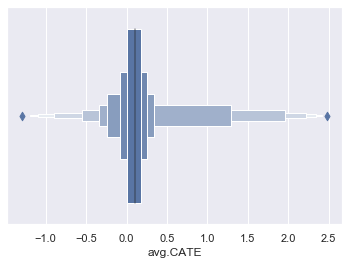

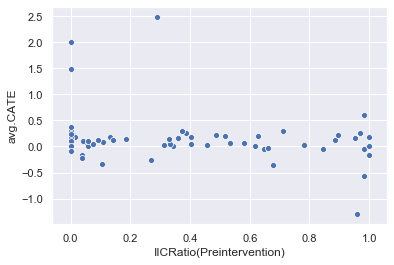

In [336]:
#negative means the drug works, positive means the drug doesn't work
sns.set()
print('Treatment Effects')
print(m.CATE_df[['avg.CATE','st_outcome',drug]].mean(axis=0))
sns.boxenplot(m.CATE_df['avg.CATE'])
print('Distance Metric')
print(pd.concat(m.M_opt_list).mean(axis=0))
plt.figure()
sns.scatterplot(df['IICRatio(Preintervention)'],m.CATE_df['avg.CATE'])

sid297
sid915


Text(0.5, 1.0, 'levetiracetam')

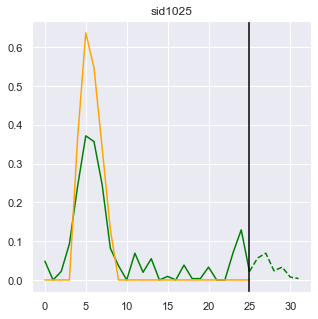

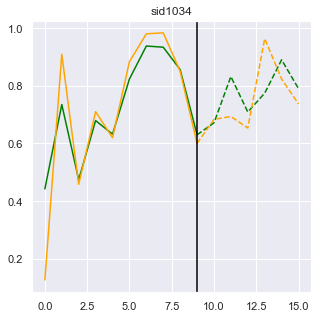

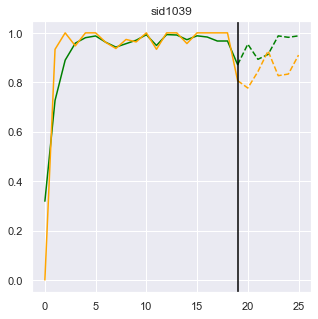

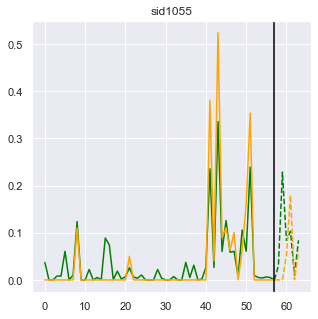

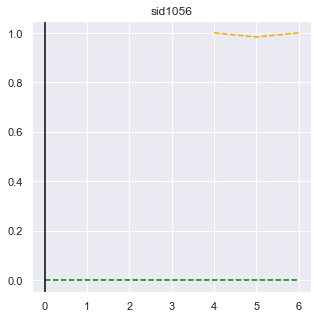

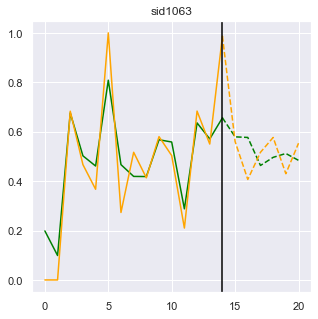

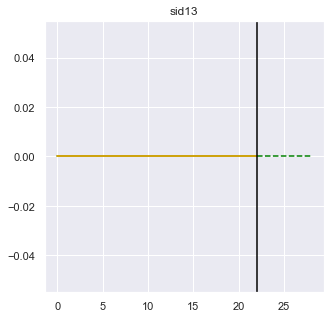

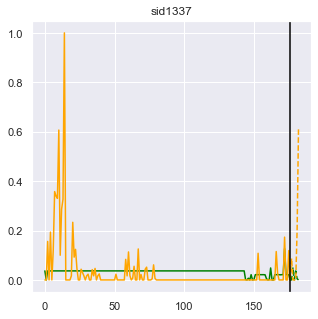

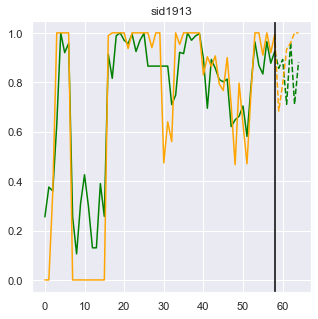

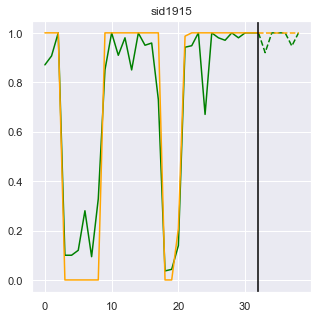

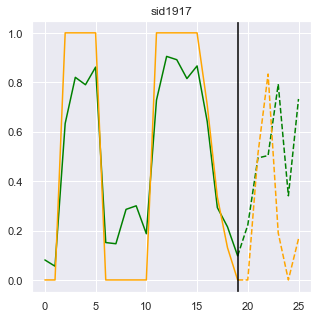

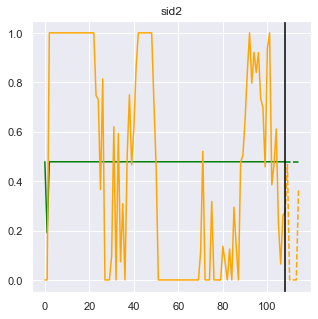

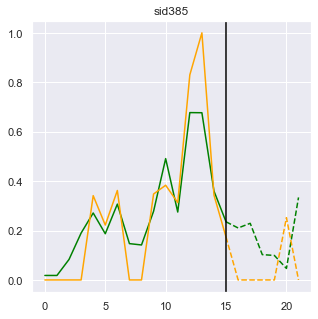

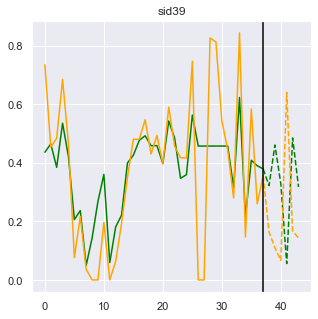

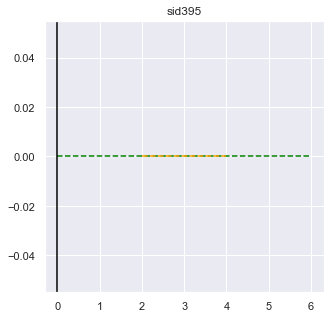

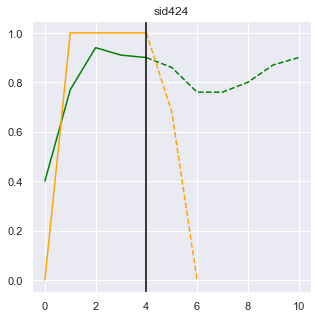

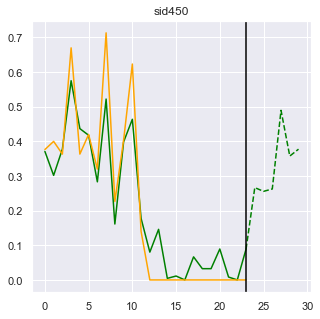

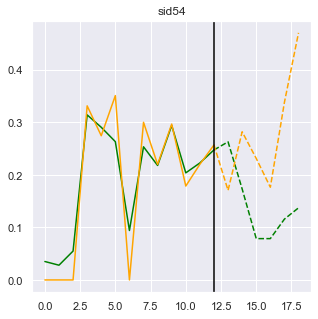

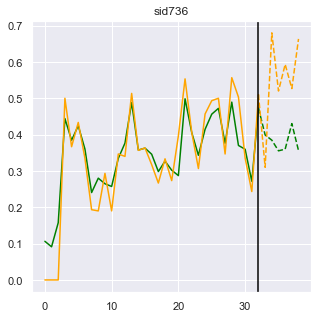

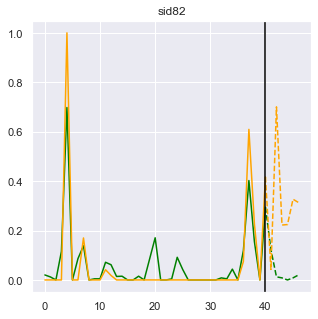

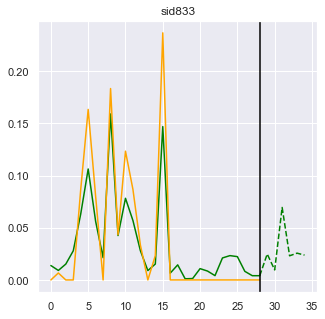

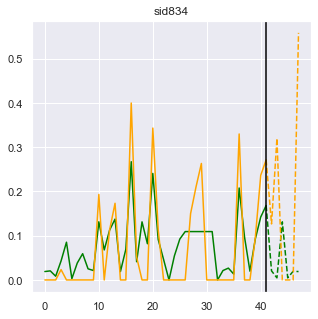

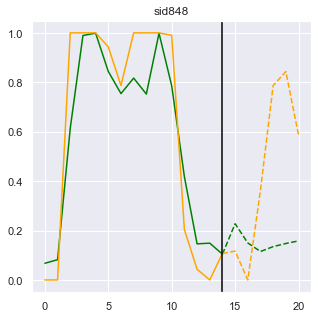

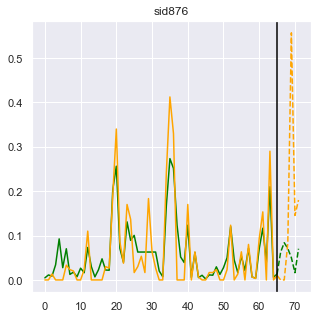

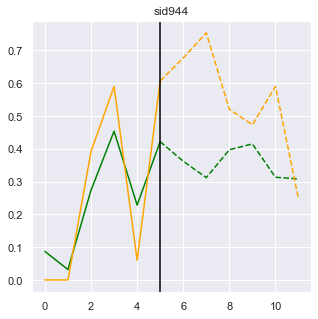

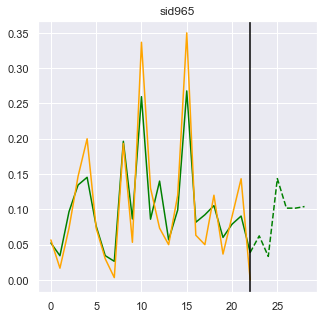

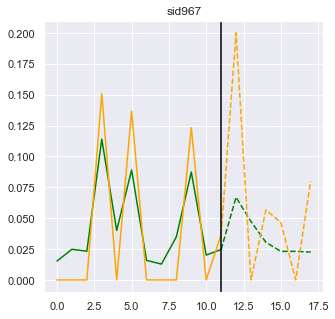

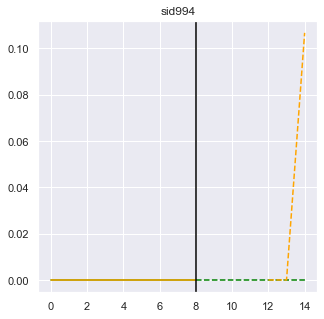

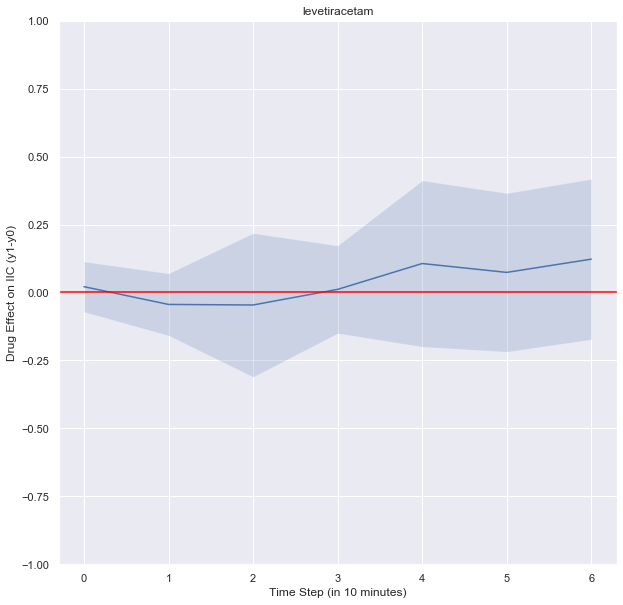

In [338]:
effect = []
for idx in m.CATE_df.index:
    if df.loc[idx,drug]==1:
        toi = time_of_int.loc[idx,0]
        mg_0 = df.loc[(m.MG_matrix.loc[idx]>0),drug]==0
        mg_0 = mg_0[mg_0==True]
        mg_0 = time_of_int.loc[mg_0.index,0]>(toi+f)
        mg_0 = mg_0[mg_0==True]
        if len(mg_0)>0:
            mg_1_preint = Pobs_pre.loc[idx,:toi].interpolate(method='linear', limit_direction='forward').fillna(method='bfill').fillna(0)
            mg_0_preint = Pobs_pre.loc[mg_0.index,:toi].interpolate(method='linear', limit_direction='forward', axis=1).fillna(method='bfill').fillna(0)
            mg_0_outcome = Pobs_pre.loc[mg_0.index,toi:toi+f].interpolate(method='linear', limit_direction='forward', axis=1).fillna(method='bfill').fillna(0)
            model = ensemble.RandomForestRegressor().fit(mg_0_preint.T,mg_1_preint)
            fig = plt.figure(figsize=(5,5))
    #         plt.plot(mg_0_outcome.mean(axis=0))
    #         plt.plot(short_term_outcome.loc[idx])
            mg_0_preint_m = model.predict(mg_0_preint.T)
            mg_0_outcome_m = model.predict(mg_0_outcome.T)
            preint = mg_1_preint.to_numpy() - mg_0_preint_m
            
            eff = short_term_outcome.loc[idx].to_numpy() - mg_0_outcome_m
            plt.plot(np.arange(0,toi+1),mg_0_preint_m,c='green')
            plt.plot(np.arange(toi,toi+f+1),mg_0_outcome_m,c='green',ls='--')
            plt.plot(np.arange(0,toi+1),mg_1_preint.to_numpy(),c='orange')
            plt.plot(np.arange(toi,toi+f+1),short_term_outcome.loc[idx].to_numpy(),c='orange',ls='--')
            plt.axvline(toi,c='black')
            plt.title(idx)
            effect.append(eff)
        else:
            print(idx)
effect = np.array(effect)
fig = plt.figure(figsize=(10,10))
plt.plot(np.arange(0,f+1),np.nanmean(effect,axis=0))
plt.fill_between(np.arange(0,f+1),
                 np.nanmean(effect,axis=0)+np.std(np.nan_to_num(effect),axis=0),
                 np.nanmean(effect,axis=0)-np.std(np.nan_to_num(effect),axis=0),alpha=0.2)
plt.axhline(0,c='red')
plt.xlabel('Time Step (in 10 minutes)')
plt.ylabel('Drug Effect on IIC (y1-y0)')
plt.ylim((-1,1))
plt.title(drug)

In [278]:
toi = time_of_int.loc[idx,0]
mg_0 = df.loc[(m.MG_matrix.loc[idx]>0),drug]==0
mg_0 = mg_0[mg_0==True]
print(mg_0.index)
mg_0 = time_of_int.loc[mg_0.index,0]>toi
mg_0 = mg_0[mg_0==True]
Pobs_pre.loc[mg_0.index,toi:toi+f].mean(axis=0).to_numpy()

Index(['sid8', 'sid18', 'sid30', 'sid88', 'sid327', 'sid406', 'sid456',
       'sid490', 'sid557', 'sid734', 'sid821', 'sid824', 'sid827', 'sid839',
       'sid852', 'sid872', 'sid881', 'sid940', 'sid960', 'sid983', 'sid1022',
       'sid1116', 'sid1956', 'sid1966'],
      dtype='object')


array([0.59174541, 0.53722222, 0.54611111, 0.49480969, 0.49532164,
       0.49388889, 0.5       , 0.55503584, 0.36131387, 0.36649215,
       0.38722222, 0.37111111, 0.42555556])

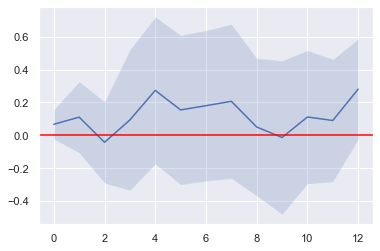

In [301]:
plt.plot(np.arange(0,13),np.nanmean(effect,axis=0))
plt.fill_between(np.arange(0,13),
                 np.nanmean(effect,axis=0)+np.std(np.nan_to_num(effect),axis=0),
                 np.nanmean(effect,axis=0)-np.std(np.nan_to_num(effect),axis=0),alpha=0.2)
plt.axhline(0,c='red')

# Part 4 Outcome Regression

In [1]:
import numpy as np
import pandas as pd
import sklearn.tree as tree
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
import pandas as pd
import sklearn.tree as tree
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import scipy.io as sio
import tqdm
import os
import sklearn.ensemble as ensemble
import sklearn.linear_model as lm
import sklearn.tree as tree
import mord

data_dir = '/Users/harshparikh/IIC/step1_output/'
warnings.filterwarnings("ignore")

In [2]:
covariates = pd.read_csv(data_dir+'covariates.csv',index_col=0)
covariates.head()

,Gender,Age,marrital,APACHE II first 24,Hx CVA (including TIA),Hx HTN,Hx Sz /epilepsy,Hx brain surgery,Hx CKD,Hx CAD/MI,...,iGCS-Total,iGCS = T?,iGCS-E,iGCS-V,iGCS-M,Worst GCS in 1st 24,Worst GCS Intubation status,iGCS actual scores,neuro_dx_Seizures/status epilepticus,prim_dx_Respiratory disorders
Index,,,,,,,,,,,,,,,,,,,,,
sid1,0,19.93,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,11,0,4,1,6,11,0,11,0,0
sid2,0,85.01,0.0,NaN,0.0,1.0,0.0,0.0,1.0,0.0,...,7,0,1,2,4,3,1,3,0,1
sid3,1,45.91,1.0,NaN,0.0,0.0,1.0,0.0,0.0,0.0,...,8,0,3,1,4,8,0,8,0,1
sid4,1,53.99,1.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,...,4,0,1,2,1,3,1,4,0,1
sid5,1,23.08,0.0,NaN,0.0,0.0,1.0,0.0,0.0,0.0,...,6,1,1,1,4,3,1,6,1,0


In [3]:
outcomes = pd.read_csv(data_dir+'outcomes.csv',index_col=0)
outcomes.head()

,DC MRS (modified ranking scale),DC GOSE (extended glasgow outcome scale),"DC dispo home=1, rehab=2, SNF =3, hospice =4, dead =5"
Index,,,
sid1,3,5,1.0
sid2,5,2,4.0
sid3,6,1,5.0
sid4,6,1,5.0
sid5,2,6,1.0


In [70]:
Y = (outcomes['DC MRS (modified ranking scale)'].loc[outcomes['DC MRS (modified ranking scale)']!='na'].dropna().astype(int) >=4).astype(int)
X = covariates.loc[Y.index][['Gender','Age','marrital',
                             'Hx CVA (including TIA)','Hx HTN','Hx Sz /epilepsy',
                             'Hx brain surgery','Worst GCS in 1st 24',
                             'neuro_dx_Seizures/status epilepticus','prim_dx_Respiratory disorders']].fillna(0)
Y.unique()
outcome_pred_model = lm.SGDClassifier(class_weight={0:1.5,1:1}).fit(X,Y)

In [71]:
pd.Series(outcome_pred_model.coef_[0],index=['Gender','Age','marrital',
                                          'Hx CVA (including TIA)','Hx HTN','Hx Sz /epilepsy',
                                          'Hx brain surgery','Worst GCS in 1st 24',
                                          'neuro_dx_Seizures/status epilepticus','prim_dx_Respiratory disorders'])

Gender                                  13.095816
Age                                      5.797358
marrital                               -32.641157
Hx CVA (including TIA)                   0.196765
Hx HTN                                 -13.248855
Hx Sz /epilepsy                        -24.530059
Hx brain surgery                        27.066144
Worst GCS in 1st 24                     -5.487562
neuro_dx_Seizures/status epilepticus   -26.978693
prim_dx_Respiratory disorders           64.254763
dtype: float64

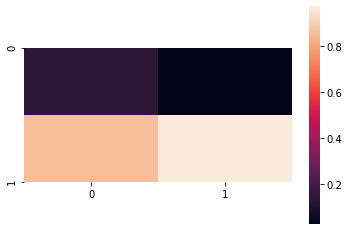

In [72]:
Y_pred = pd.Series(outcome_pred_model.predict(X),index=Y.index).astype(int)
keys = list(Y.unique())
keys.sort()
conf_mat = pd.DataFrame(np.zeros((len(Y.unique()),len(Y.unique()))),index=keys,columns=keys)
for i in Y.index:
    try:
        conf_mat.loc[Y_pred.loc[i],Y.loc[i]] = 1 + conf_mat.loc[Y_pred[i],Y[i]]
    except:
        print((Y_pred.loc[i],Y.loc[i]))
        break
for i in Y.index:
    conf_mat.loc[:,Y.loc[i]] = conf_mat.loc[:,Y.loc[i]]/conf_mat.loc[:,Y.loc[i]].sum()

sns.heatmap(conf_mat,square=True)

In [73]:
outcome_pred_model.score(X,Y)

0.7994949494949495

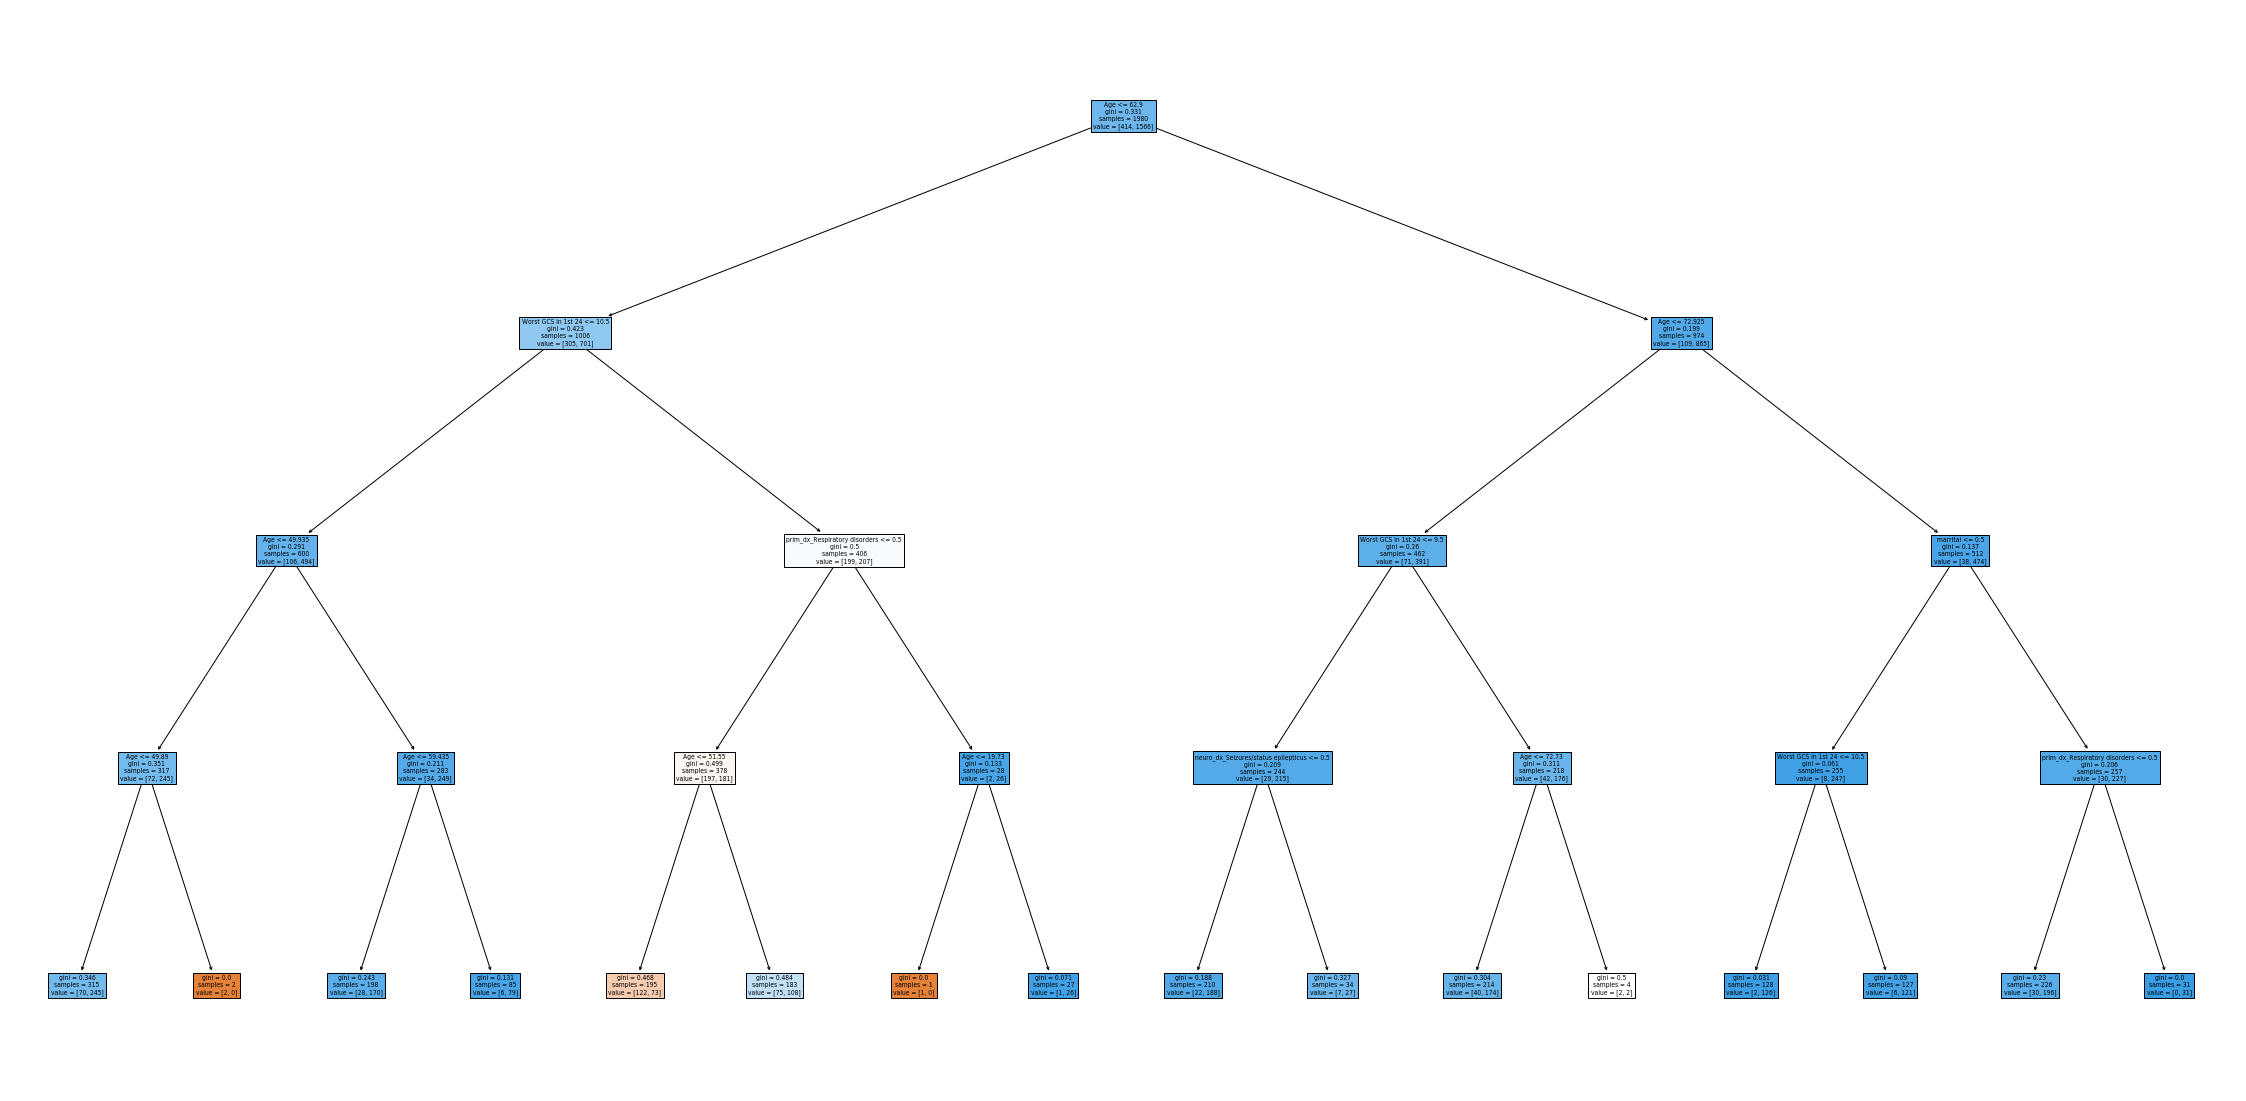

In [14]:
fig = plt.figure(figsize=(40,20))
tree.plot_tree(outcome_pred_model,feature_names=list(X.columns),filled=True)
plt.savefig('outcome_regressionn_tree.png')

In [8]:
import graphviz
from dtreeviz.trees import dtreeviz

In [11]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [9]:
viz = dtreeviz(outcome_pred_model, X, Y,
               target_name="Outcome",
               feature_names=list(X.columns),
               class_names=['Bad','Good'])
viz

ExecutableNotFound: failed to execute ['dot', '-Tsvg', '-o', '/var/folders/v4/ptm640kj35q2tgwljffspkn00000gn/T/DTreeViz_4095.svg', '/var/folders/v4/ptm640kj35q2tgwljffspkn00000gn/T/DTreeViz_4095'], make sure the Graphviz executables are on your systems' PATH

In [10]:
dot_data = tree.export_graphviz(outcome_pred_model)
graph = graphviz.Source(dot_data, format="png") 
graph

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH